# Housing Prices

This notebook demonstrates a basic approach to data science on a very common dataset, the housing prices dataset. This notebook utilizes a number of custom made functions for exploratory data analysis (EDA) for single variable and pairwise analysis, as well as some other interesting analysis techniques.

We import the following tools to help us with our analysis, and then load the dataset from Kaggle:

In [447]:
# Import Packages, Tools, & Libraries
import os, sys
sys.path.append(os.path.abspath('..'))
from tools.analysis import single_variable_EDA, pairwise_EDA
%load_ext autoreload
%autoreload 2

# Download house prices dataset from kaggle
# https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
!kaggle datasets download -d yasserh/housing-prices-dataset

# Extract zipfile
import zipfile
import os

# Find the downloaded zip file
zipfile_name = next(f for f in os.listdir() if f.endswith('.zip'))
print(f"Extracting {zipfile_name}")

# Extract the zip file
with zipfile.ZipFile(zipfile_name, 'r') as zip_ref:
    zip_ref.extractall()

# Create data folder and move CSV files
os.makedirs('data', exist_ok=True)
for file in os.listdir():
    if file.endswith('.csv'):
        os.rename(file, os.path.join('data', file))

# Cleanup
os.remove(zipfile_name)
print("Successfully downloaded and extracted dataset")

# Automatically detect dataset filename, save filepath of dataset
dataset_filename = next(f for f in os.listdir('data') if f.endswith('.csv'))
dataset_filepath = os.path.join('data', dataset_filename)
print(f"Dataset file path: {dataset_filepath}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/4.63k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.63k/4.63k [00:00<00:00, 21.3MB/s]
Extracting housing-prices-dataset.zip
Successfully downloaded and extracted dataset
Dataset file path: data/Housing.csv


In [448]:
import pandas as pd
df = pd.read_csv(dataset_filepath, header=0, index_col=None)

### Dataset Description

As mentioned previously, this is one of the most basic datasets that many budding, aspiring scientists use for their first forray into the world of data, data science, analysis, and machine learning. In particular, we will use the dataset that is publically available here on Kaggle (https://www.kaggle.com/datasets/yasserh/housing-prices-dataset). This dataset presents us with a basic regression problem: can we predict house price using a number of features regarding a property. Here are the citations:

1. Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
2. Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

### Features

This dataset offers a number of simple features:

1. `price` - This is the target variable, continuous and numerical. It represents the price of the house, presumably in USD.
2. `area` - This is the area of the house, continuous and numerical. It's likely measured in square footage.
3. `bedrooms` - This is the number of bedrooms in the house, which is ordinal.
4. `bathrooms` - This is the number of bathrooms in the house, also ordinal.
5. `stories` - This is the number of stories in the house, also ordinal.
6. `mainroad` - This indicates whether the house is on a main road, a boolean variable encoded as "yes" or "no".
7. `guestroom` - This indicates whether the house has a guest room, a boolean variable encoded as "yes" or "no".
8. `basement` - This indicates whether the house has a basement, a boolean variable encoded as "yes" or "no".
9. `hotwaterheating` - This indicates whether the house has hot water heating, a boolean variable encoded as "yes" or "no".
10. `airconditioning` - This indicates whether the house has air conditioning, a boolean variable encoded as "yes" or "no".
11. `parking` - This is the number of parking spaces available with the house, an ordinal variable.
12. `prefarea` - This indicates whether the house is located in a preferred area, a boolean variable encoded as "yes" or "no".
13. `furnishingstatus` - This indicates the furnishing status of the house, which is categorical and can be "furnished", "semi-furnished", or "unfurnished".

### Domain knowledge and hypotheses

1. `price` - We would assume there would be a wide range of house prices, probably with more houses on the lower end of the ranges (right-skewed).
2. `area` - We'd guess that there'd be a somewhat normal distribution of square footage of houses, with most houses being near some median area. And with more square footage, we'd likely see higher prices, as well as increases or presence of other features.
3. `bedrooms` - We'd expect most houses to land between 1-3 bedrooms, as that is pretty typical for an American household/family. It stands to reason that more bedrooms would likely mean a higher price paid, though there might be a tradeoff between this and area or other room counts.
4. `bathrooms` - We'd expect that the number of bathrooms would correlate with the number of bedrooms. More bathrooms typically suggest a higher price, as they are often a sign of a more comfortable and potentially luxurious house.
5. `stories` - Most homes should just be 1 story. Houses with more stories might be expected to have higher prices, as multiple stories can indicate a larger overall area and more living space.
6. `mainroad` - Since most homes are in a cul-de-sac in the US, we'd expect few homes on the main road. Houses on a main road might be cheaper due to noise and traffic concerns, but this could vary depending on the desirability of the main road's location.
7. `guestroom` - Having a guest room might be seen as a luxury feature, suggesting a higher price.
8. `basement` - Hard to say if most houses have a basement without knowing the geographic area, but we'd assume less houses have basements. A basement could add to the overall area of the house and might be an indicator of higher prices, especially if the basement is finished and usable as living space. I'd also add that this is an interesting feature that this dataset exhibits. Most California homes don't have a basement, so the presence of this feature already indicates a potential geographic location of this dataset.
9. `hotwaterheating` - In the modern era, most houses should have a boiler, though this fact may actually help us indicate an older house which likely has a lower price (though I'm not sure of this and would be interested in researching this more).
10. `airconditioning` - This is a bit of a luxury, so we don't expect most houses to have this. Houses with air conditioning might be more desirable, especially in warmer climates, potentially leading to higher prices.
11. `parking` - We imagine most houses having 1-3 parking spots. More parking spaces could correlate with higher prices, as this is a valuable feature for many buyers.
12. `prefarea` - By nature of "preferred", we believe the exlcusivity of this makes most homes not in this area. Houses in preferred areas are likely to be more expensive due to higher demand and better neighborhood amenities.
13. `furnishingstatus` - Note, I don't believe this means whether or not the house is staged, but I may be mistaken. Few owners sell the house furnished, nor do buyes typically want other people's furniture, so we expect most homes unfurinished or semi-furnished. In any case, a furnished houses might be more expensive due to the added value of the furnishings, while unfurnished houses might be cheaper but offer more flexibility to buyers.

### Single Variable EDA

Now we begin a detailed EDA by looking at each variable one-by-one:

#### Price

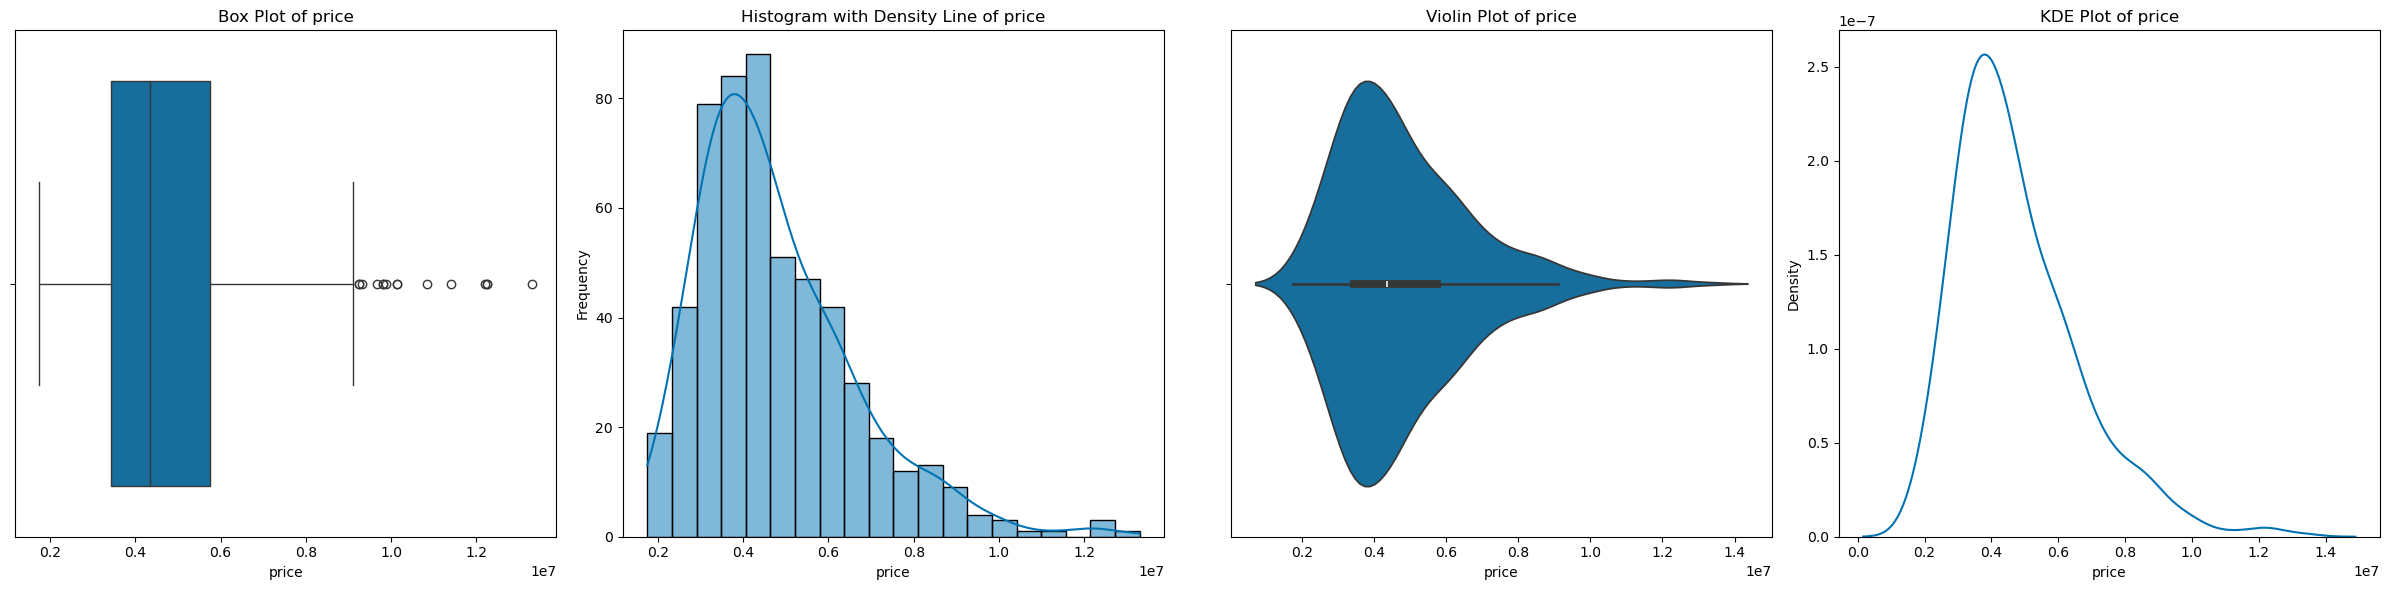

Aggregate Statistics of price:


count,mean,std,min,25%,50%,75%,max,missing
545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0,0


Outlier examples (using IQR method) of price:


price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


Note: only up to the first 25 outliers are displayed.
Total number of potential outliers: 15
Lower Bound (Q1 - 1.5*IQR): -35,000.0000 / Upper Bound (Q3 + 1.5*IQR): 9,205,000.0000


In [449]:
single_variable_EDA(df, 'price')

We see that for `price`, we have right-skew meaning most house prices are on the lower end of the spectrum. We do have some potential outliers to contend with.

#### Area

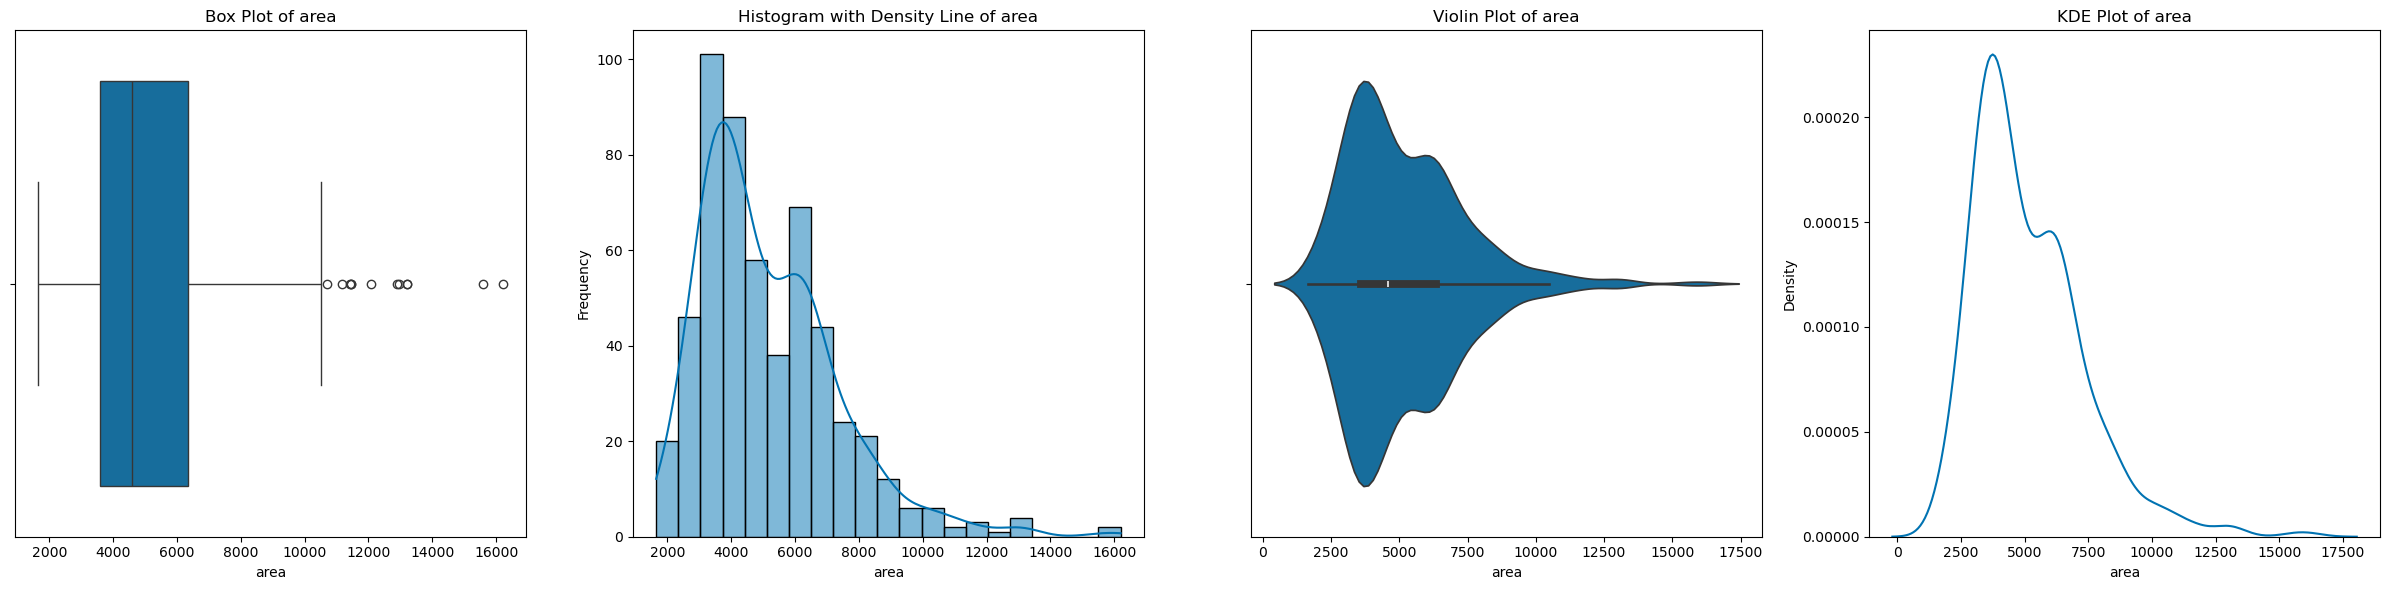

Aggregate Statistics of area:


count,mean,std,min,25%,50%,75%,max,missing
545.0,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0,0


Outlier examples (using IQR method) of area:


price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


Note: only up to the first 25 outliers are displayed.
Total number of potential outliers: 12
Lower Bound (Q1 - 1.5*IQR): -540.0000 / Upper Bound (Q3 + 1.5*IQR): 10,500.0000


In [450]:
single_variable_EDA(df, 'area')

`Area` appears to also be right-skewed, with an interesting spike around $60,000. There are also some potential outliers.

#### Bedrooms

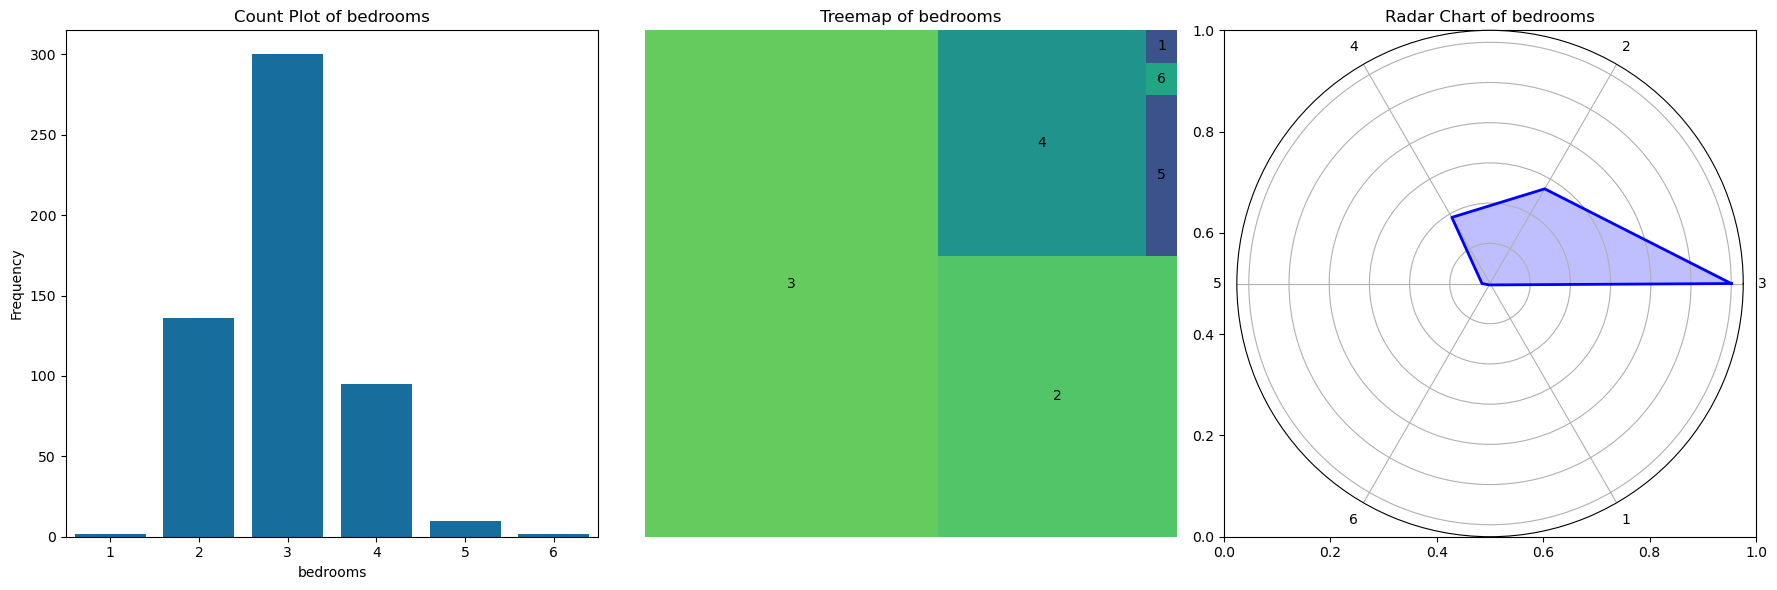

bedrooms,count,percentage
3,300,55.05%
2,136,24.95%
4,95,17.43%
5,10,1.83%
6,2,0.37%
1,2,0.37%
bedrooms,count,percentage
1,2,0.37%
2,136,24.95%
3,300,55.05%


Aggregate Statistics of bedrooms:


count,mean,std,min,25%,50%,75%,max,missing
545.0,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0,0


In [451]:
single_variable_EDA(df, 'bedrooms')

`Bedrooms` has the most frequent value as 3 or 2, but instead of next 1, it's actually 4! This may mean more houses in the dataset are family oriented.

#### Bathrooms

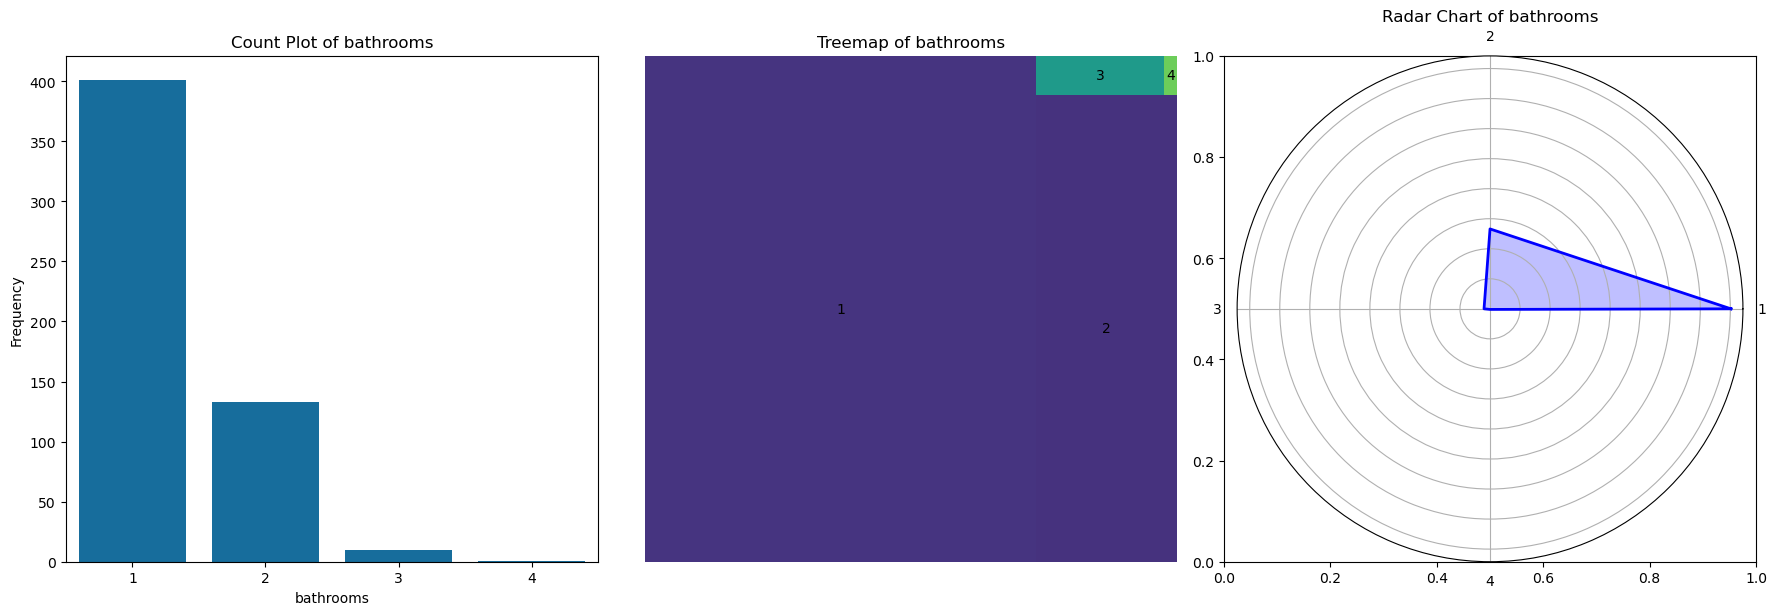

bathrooms,count,percentage
1,401,73.58%
2,133,24.4%
3,10,1.83%
4,1,0.18%
bathrooms,count,percentage
1,401,73.58%
2,133,24.4%
3,10,1.83%
4,1,0.18%


Aggregate Statistics of bathrooms:


count,mean,std,min,25%,50%,75%,max,missing
545.0,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0,0


In [452]:
single_variable_EDA(df, 'bathrooms')

Most homes in our dataset have only 1 bathroom, and then 2. There's no home with more than 4 bathrooms.

#### Stories

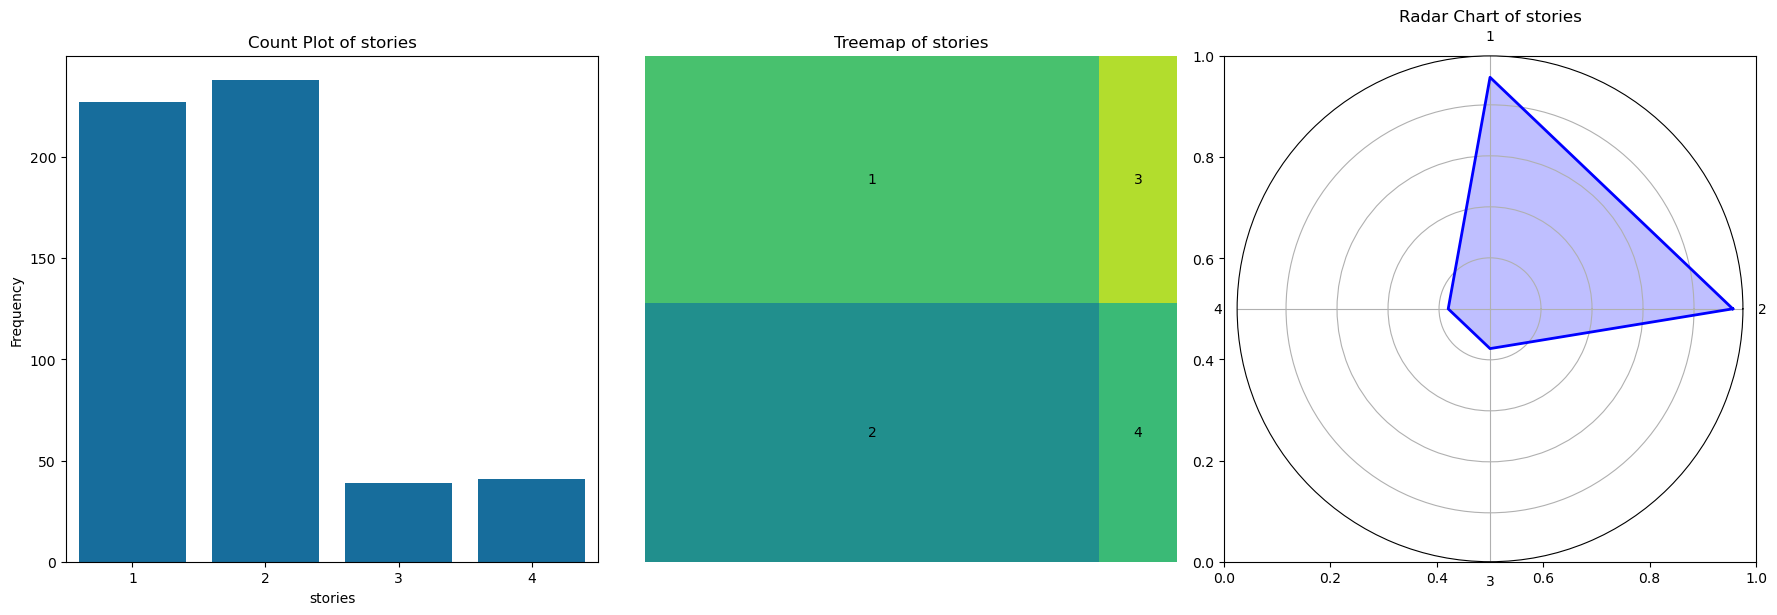

stories,count,percentage
4,41,7.52%
3,39,7.16%
2,238,43.67%
1,227,41.65%
stories,count,percentage
1,227,41.65%
2,238,43.67%
3,39,7.16%
4,41,7.52%


Aggregate Statistics of stories:


count,mean,std,min,25%,50%,75%,max,missing
545.0,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0,0


In [453]:
single_variable_EDA(df, 'stories')

Most homes only have 1 `story`, though it's actually pretty close between 1 and 2 stories.

#### Mainroad

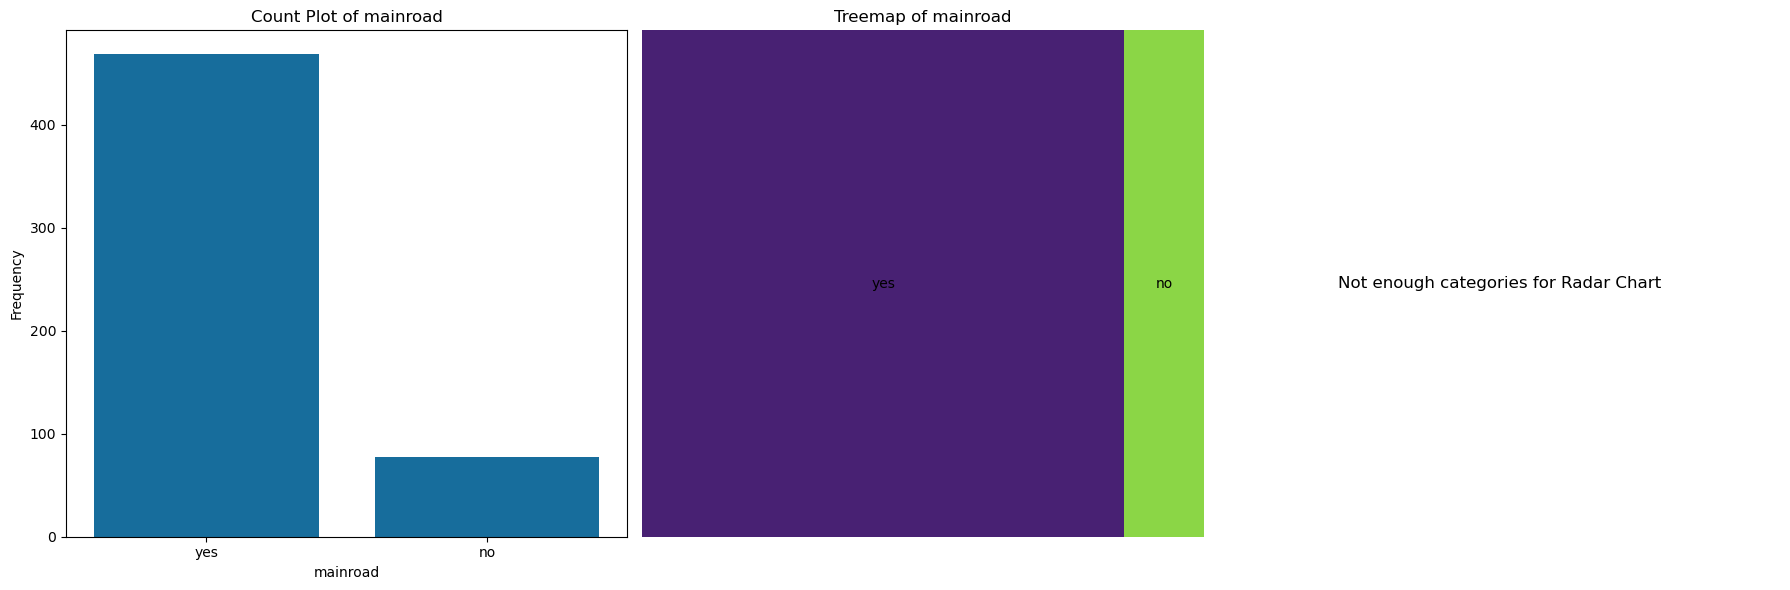

mainroad,count,percentage
yes,468,85.87%
no,77,14.13%
mainroad,count,percentage
no,77,14.13%
yes,468,85.87%


Aggregate Statistics of mainroad:


count,unique,top,freq,missing
545,2,yes,468,0


In [454]:
single_variable_EDA(df, 'mainroad')

Most homes in our dataset overwhelmingly are on the `mainroad`, which is contrary to original belief.

#### Guestroom

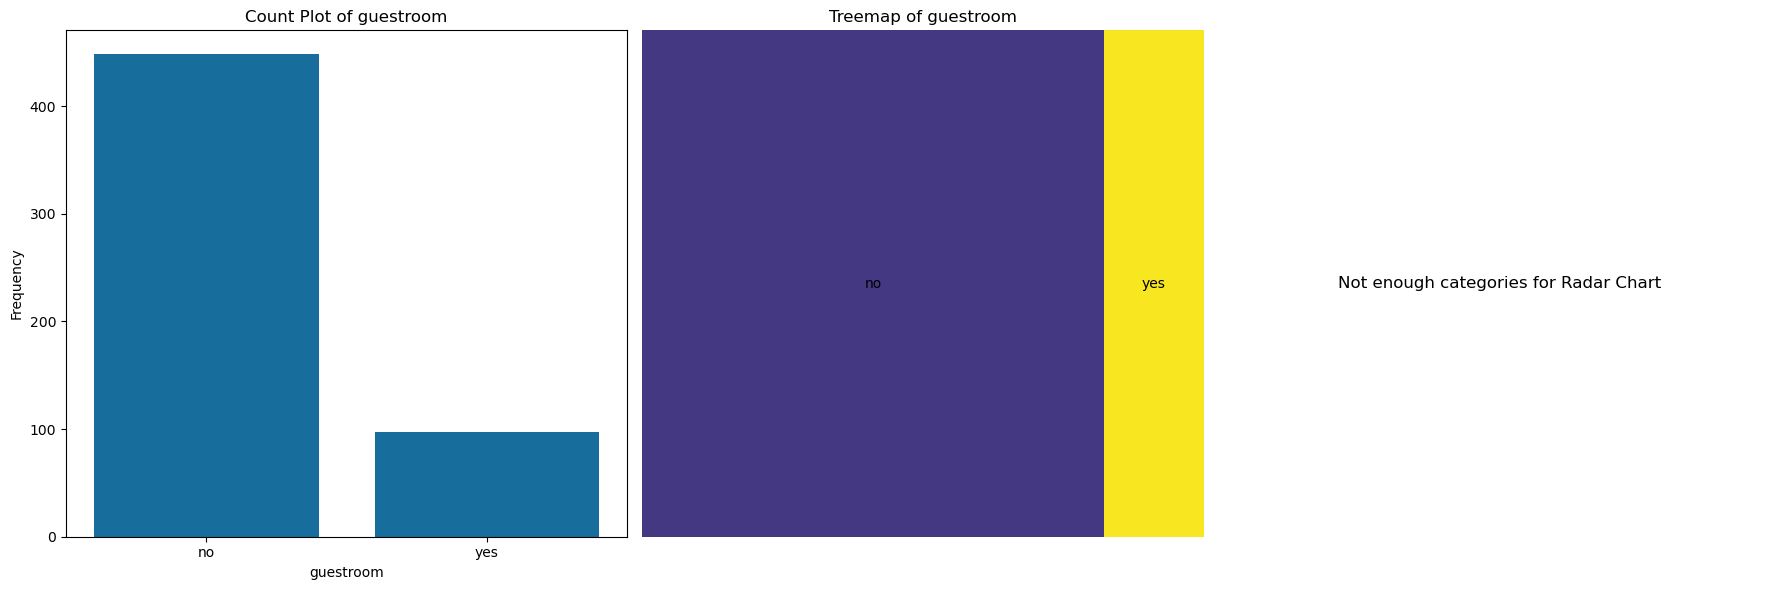

guestroom,count,percentage
no,448,82.2%
yes,97,17.8%
guestroom,count,percentage
no,448,82.2%
yes,97,17.8%


Aggregate Statistics of guestroom:


count,unique,top,freq,missing
545,2,no,448,0


In [455]:
single_variable_EDA(df, 'guestroom')

Most homes in our dataset do not have a `guestroom`, which is probably a bit of a luxury.

#### Basement

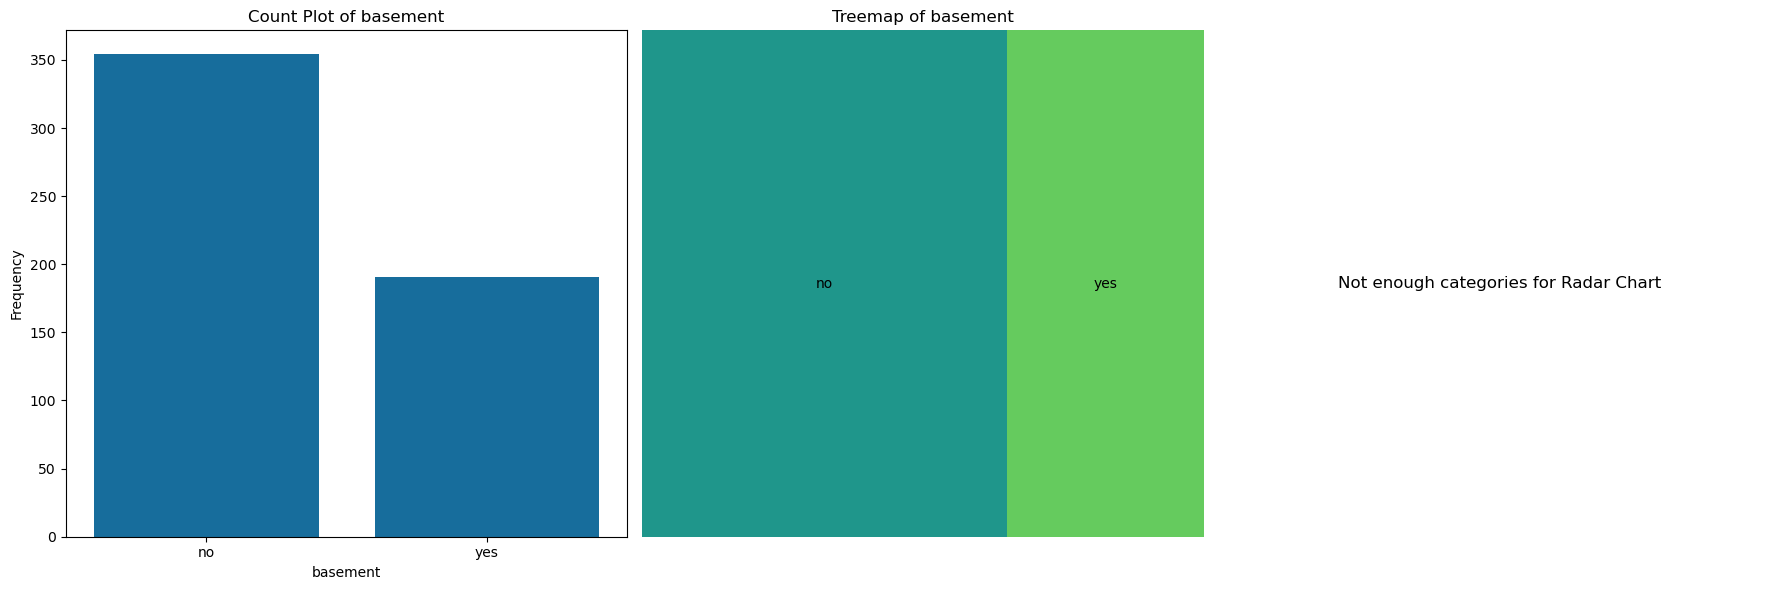

basement,count,percentage
no,354,64.95%
yes,191,35.05%
basement,count,percentage
no,354,64.95%
yes,191,35.05%


Aggregate Statistics of basement:


count,unique,top,freq,missing
545,2,no,354,0


In [456]:
single_variable_EDA(df, 'basement')

Most our homes do not have a `basement`. About 35\% of homes do.

#### Hot water heating

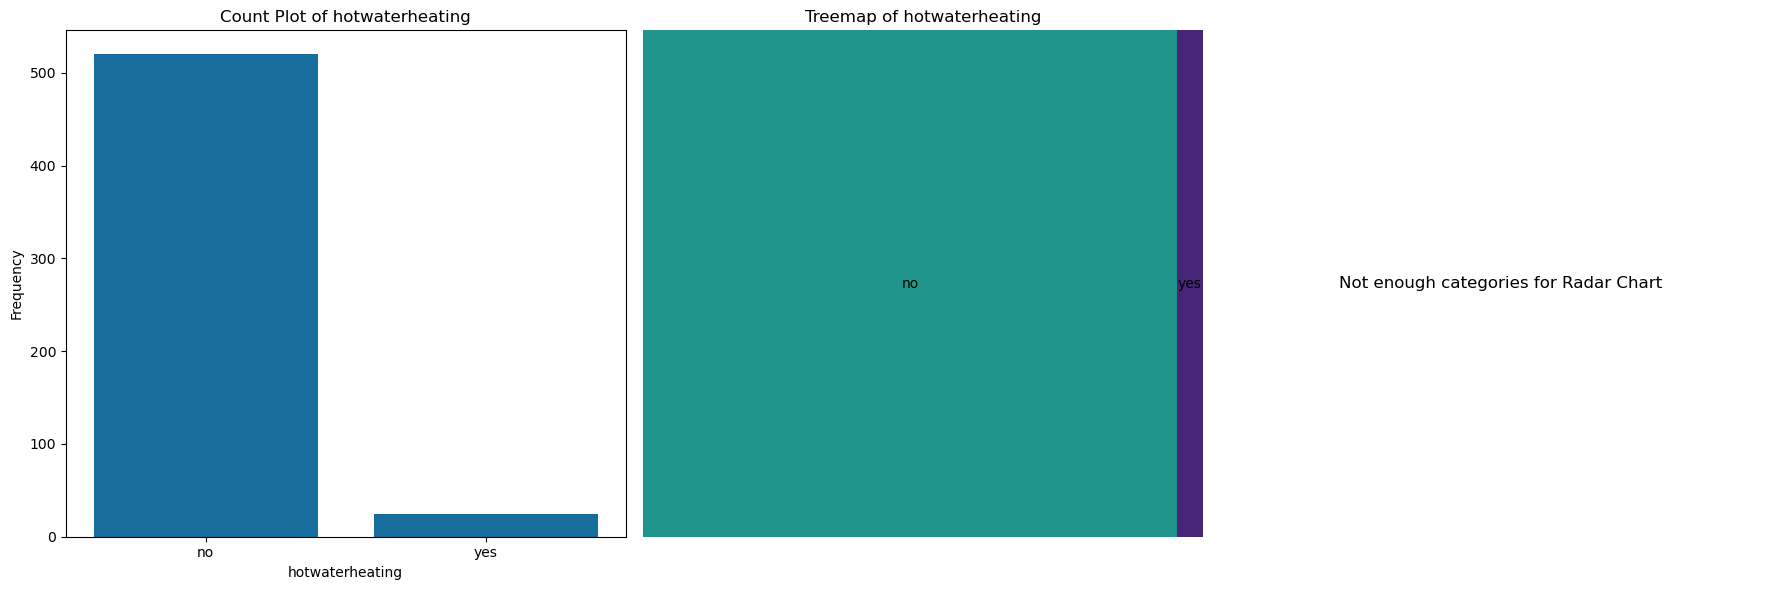

hotwaterheating,count,percentage
no,520,95.41%
yes,25,4.59%
hotwaterheating,count,percentage
no,520,95.41%
yes,25,4.59%


Aggregate Statistics of hotwaterheating:


count,unique,top,freq,missing
545,2,no,520,0


In [457]:
single_variable_EDA(df, 'hotwaterheating')

Overwhelmingly, 95\% of homes have water heating. It may be worth investigating these homes without.

#### Air conditioning

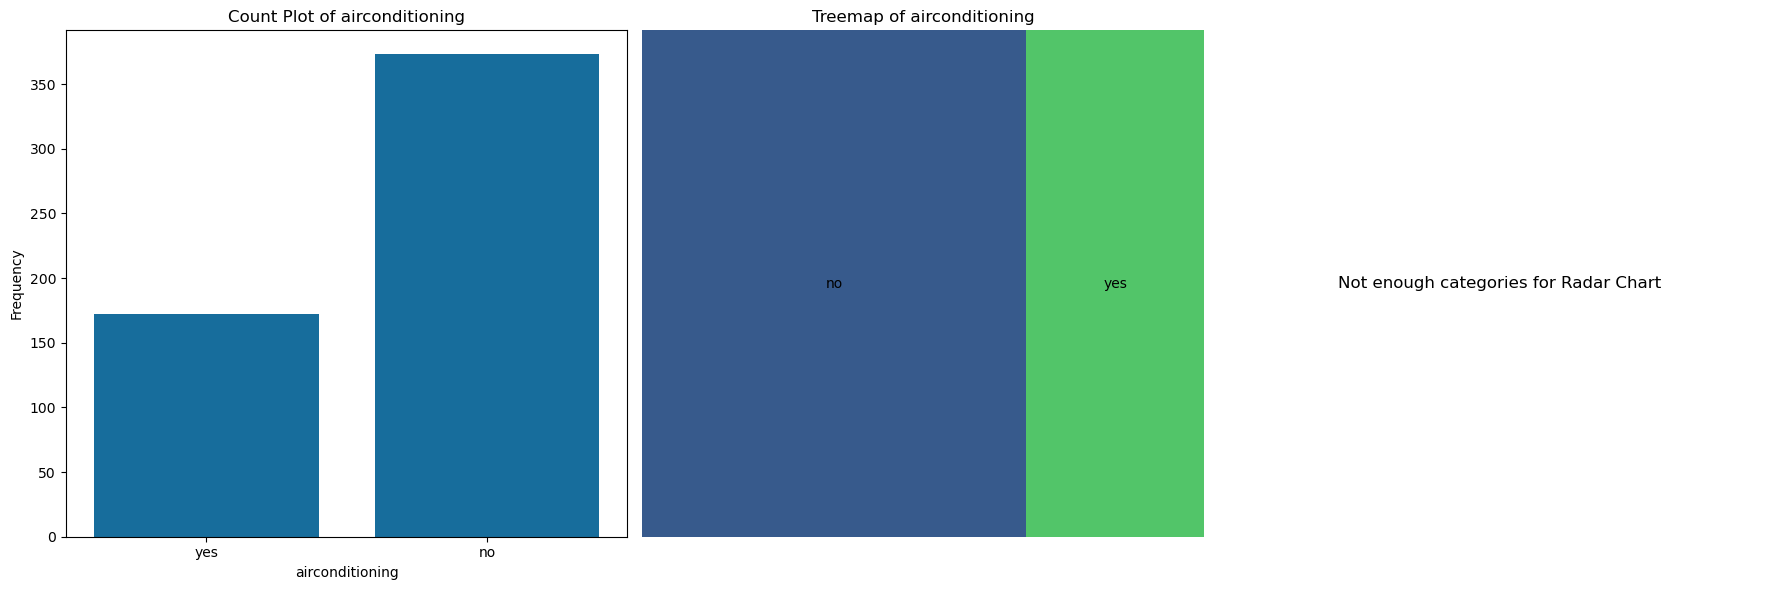

airconditioning,count,percentage
no,373,68.44%
yes,172,31.56%
airconditioning,count,percentage
no,373,68.44%
yes,172,31.56%


Aggregate Statistics of airconditioning:


count,unique,top,freq,missing
545,2,no,373,0


In [458]:
single_variable_EDA(df, 'airconditioning')

Most homes do NOT have air conditioning, which is probably a luxury. One can guess this is probably not Arizona.

#### Parking

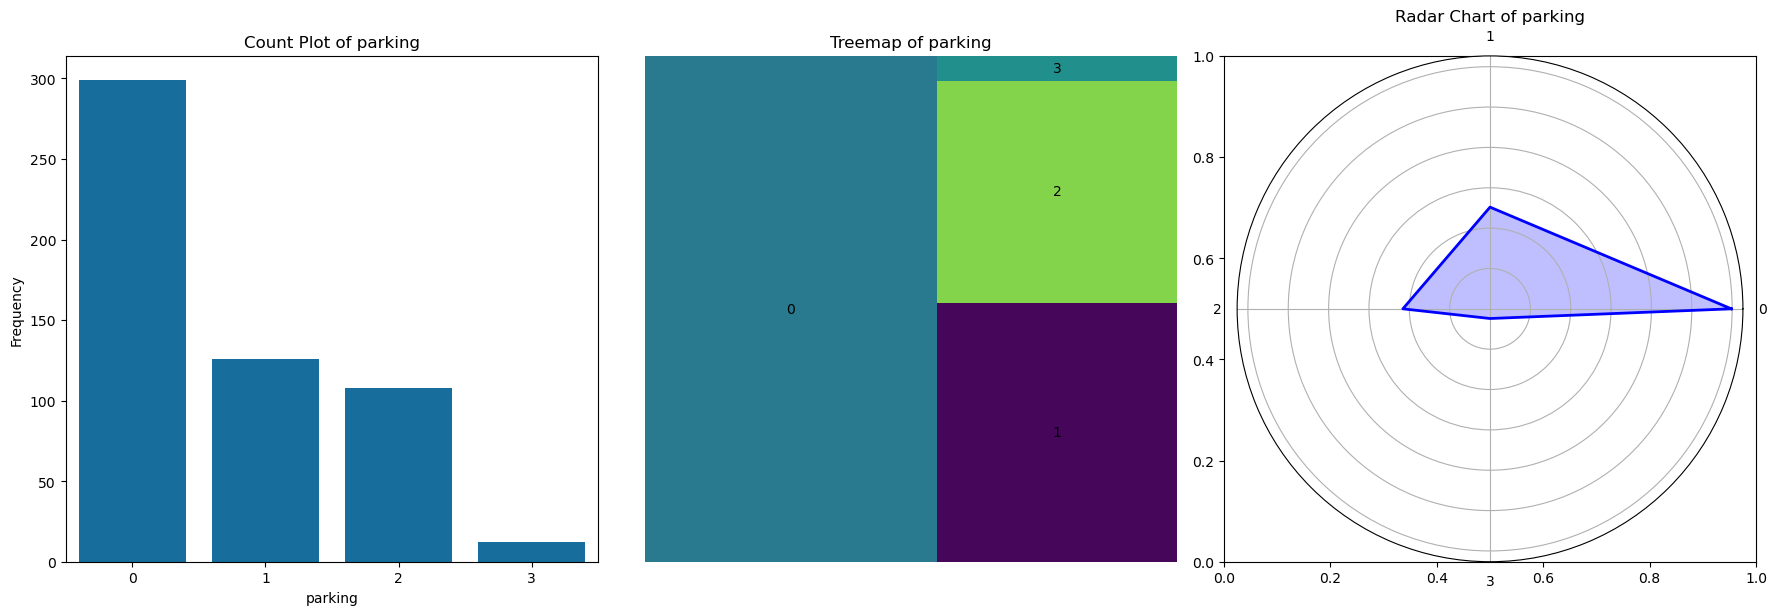

parking,count,percentage
0,299,54.86%
1,126,23.12%
3,12,2.2%
2,108,19.82%
parking,count,percentage
0,299,54.86%
1,126,23.12%
2,108,19.82%
3,12,2.2%


Aggregate Statistics of parking:


count,mean,std,min,25%,50%,75%,max,missing
545.0,0.693578,0.861586,0.0,0.0,0.0,1.0,3.0,0


In [459]:
single_variable_EDA(df, 'parking')

Most homes actually have no `parking` (0), which makes me wonder what exactly is meant by this variable.

#### Preferred Area

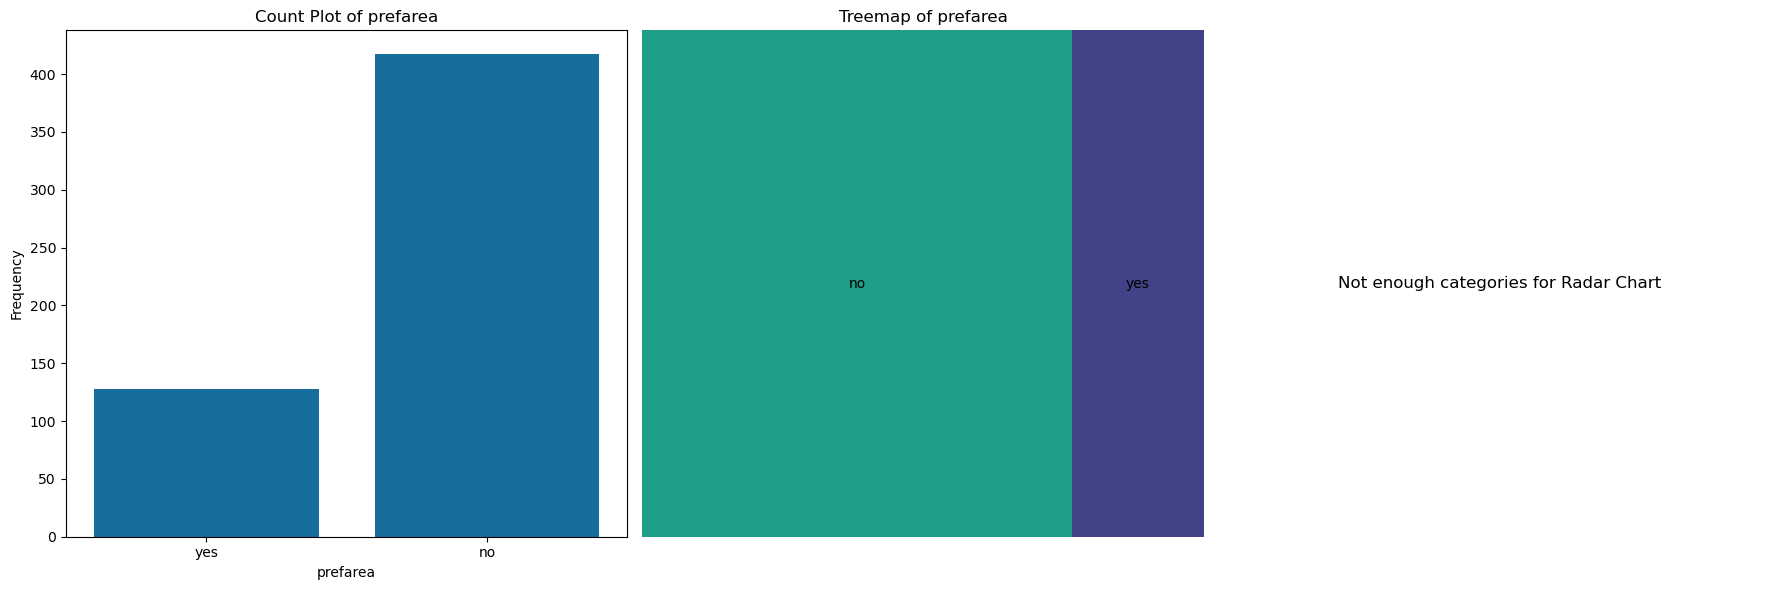

prefarea,count,percentage
no,417,76.51%
yes,128,23.49%
prefarea,count,percentage
no,417,76.51%
yes,128,23.49%


Aggregate Statistics of prefarea:


count,unique,top,freq,missing
545,2,no,417,0


In [460]:
single_variable_EDA(df, 'prefarea')

Most homes are not in the preferred area, which is what we guessed.

#### Furnishing Status

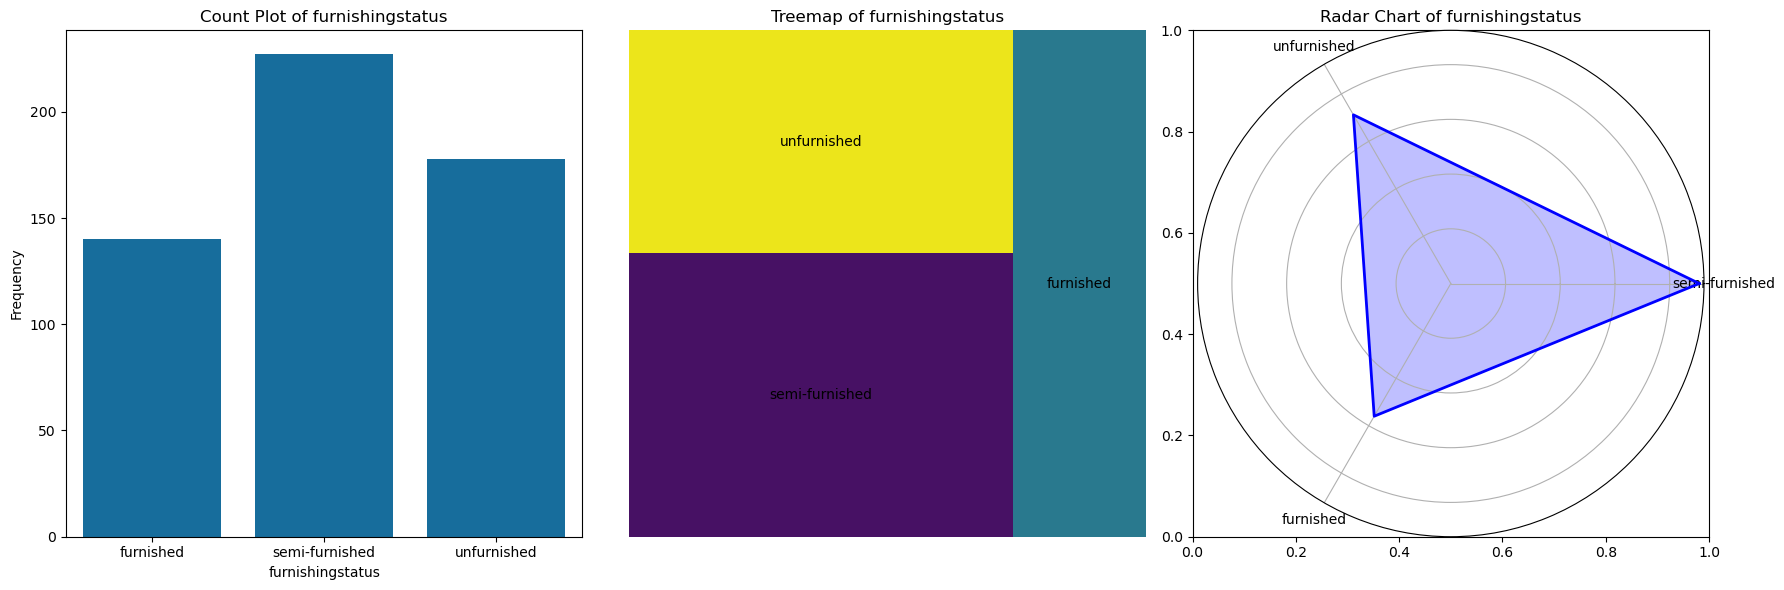

furnishingstatus,count,percentage
semi-furnished,227,41.65%
unfurnished,178,32.66%
furnished,140,25.69%
furnishingstatus,count,percentage
furnished,140,25.69%
semi-furnished,227,41.65%
unfurnished,178,32.66%


Aggregate Statistics of furnishingstatus:


count,unique,top,freq,missing
545,3,semi-furnished,227,0


In [461]:
single_variable_EDA(df, 'furnishingstatus')

Surprisingly, most homes are actually semi-furnished, then unfurnished, though these percentages are not that far off from each other. We thought it would be overwhelmingly unfurnished. I do wonder if having even one item as furniture would technically mean semi-furnished. It may have been better if this was captured as the number of furnishings, or even better the value of the leftover furnishings, but these were probably not easy to capture.

### Pairwise EDA

We continue with a pairwise EDA, specifically between our variables and `price`, our target.

#### Price vs area

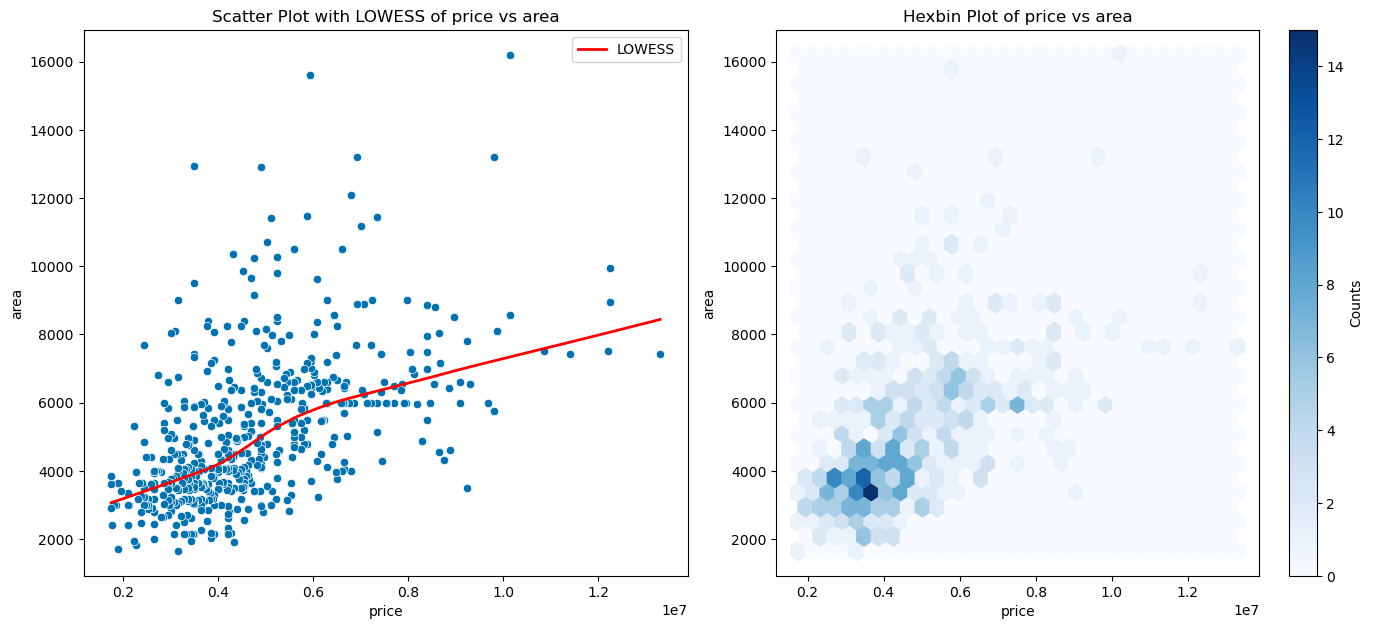

Correlation Measure,Correlation Value,Description,Explanation
Pearson,0.535997,Moderate positive correlation,Linear relationship. Sensitive to outliers and non-linearity.
Spearman,0.602859,Moderate positive correlation,Monotonic relationship. Differs from Pearson in handling outliers and non-linearity.
Kendall,0.422227,Weak positive correlation,Ordinal (rank) relationship. Differs from Spearman in handling ties.


In [462]:
pairwise_EDA(df, 'price', 'area')

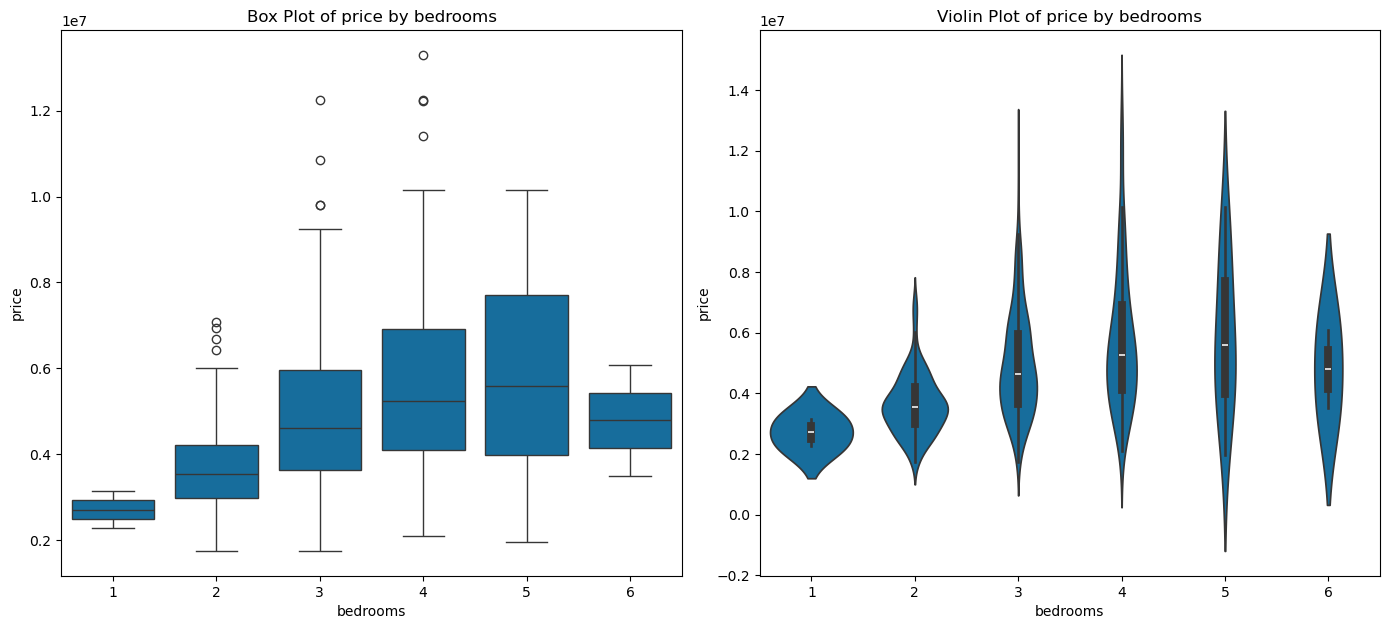

Correlation Measure,Correlation Value,Description,Explanation
Correlation Ratio (Eta),0.704966,Moderate positive correlation,Measures correlation between a categorical and a continuous variable.


In [463]:
pairwise_EDA(df, 'price', 'bedrooms')

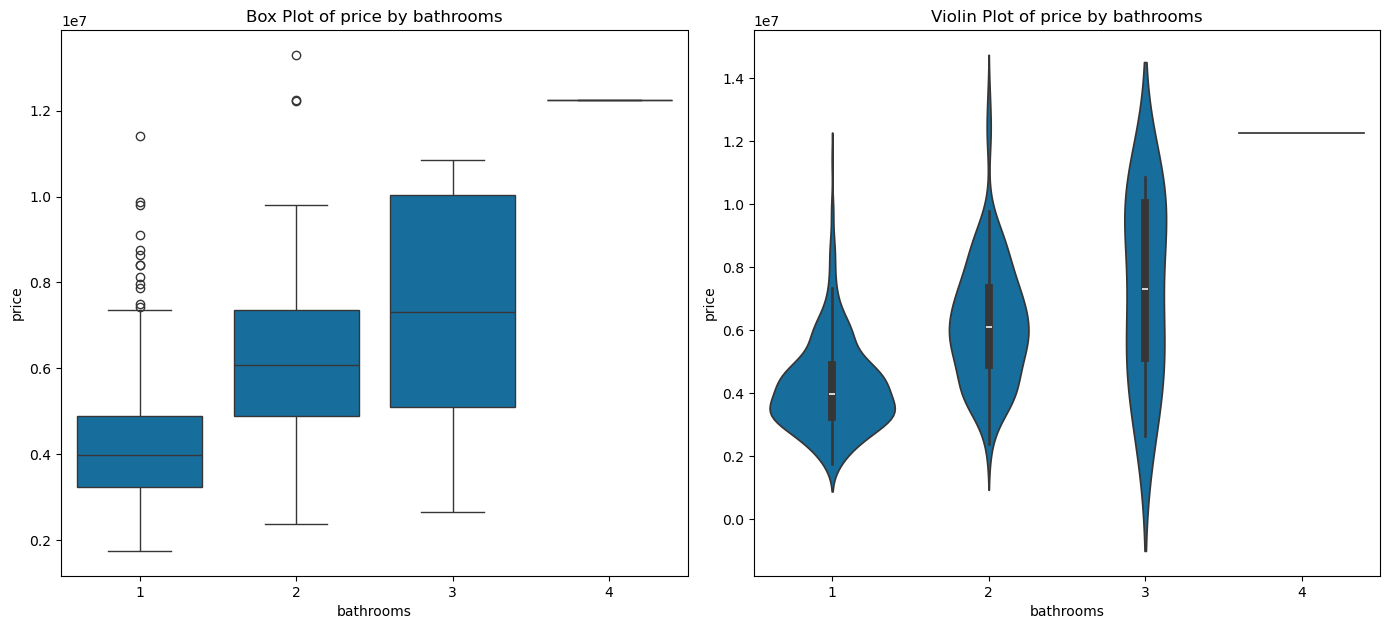

Correlation Measure,Correlation Value,Description,Explanation
Correlation Ratio (Eta),0.776183,Moderate positive correlation,Measures correlation between a categorical and a continuous variable.


In [464]:
pairwise_EDA(df, 'price', 'bathrooms')

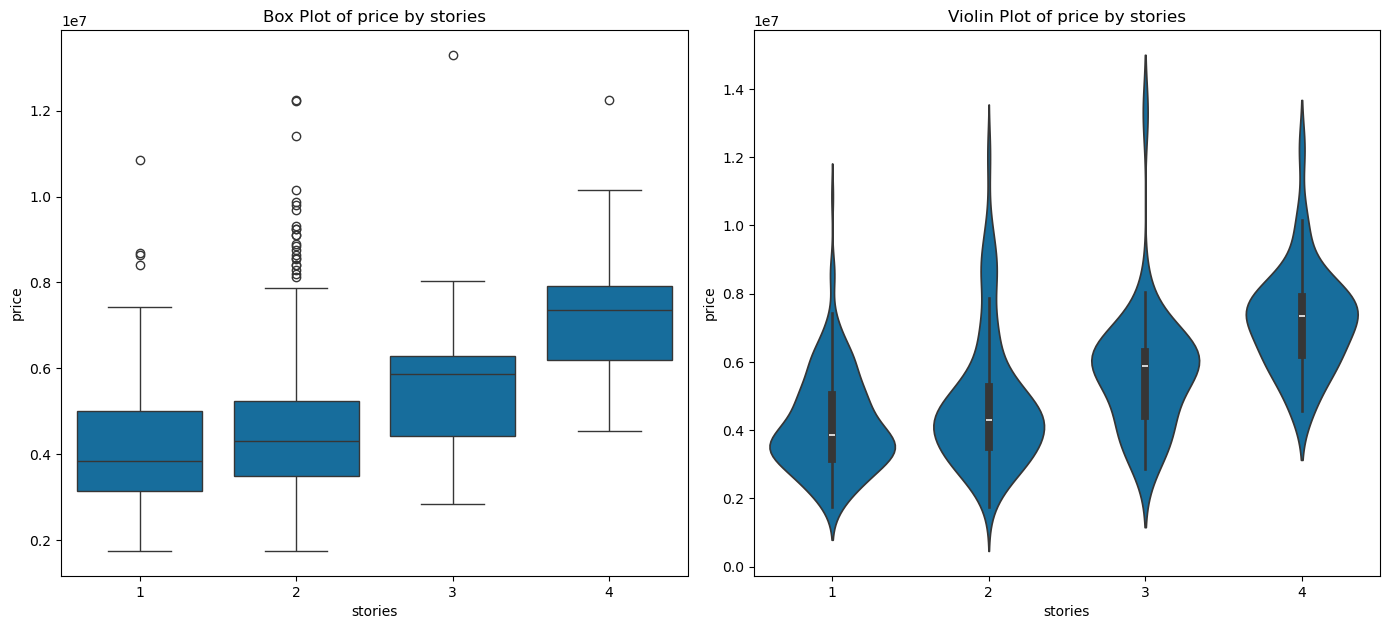

Correlation Measure,Correlation Value,Description,Explanation
Correlation Ratio (Eta),0.753042,Moderate positive correlation,Measures correlation between a categorical and a continuous variable.


In [465]:
pairwise_EDA(df, 'price', 'stories')

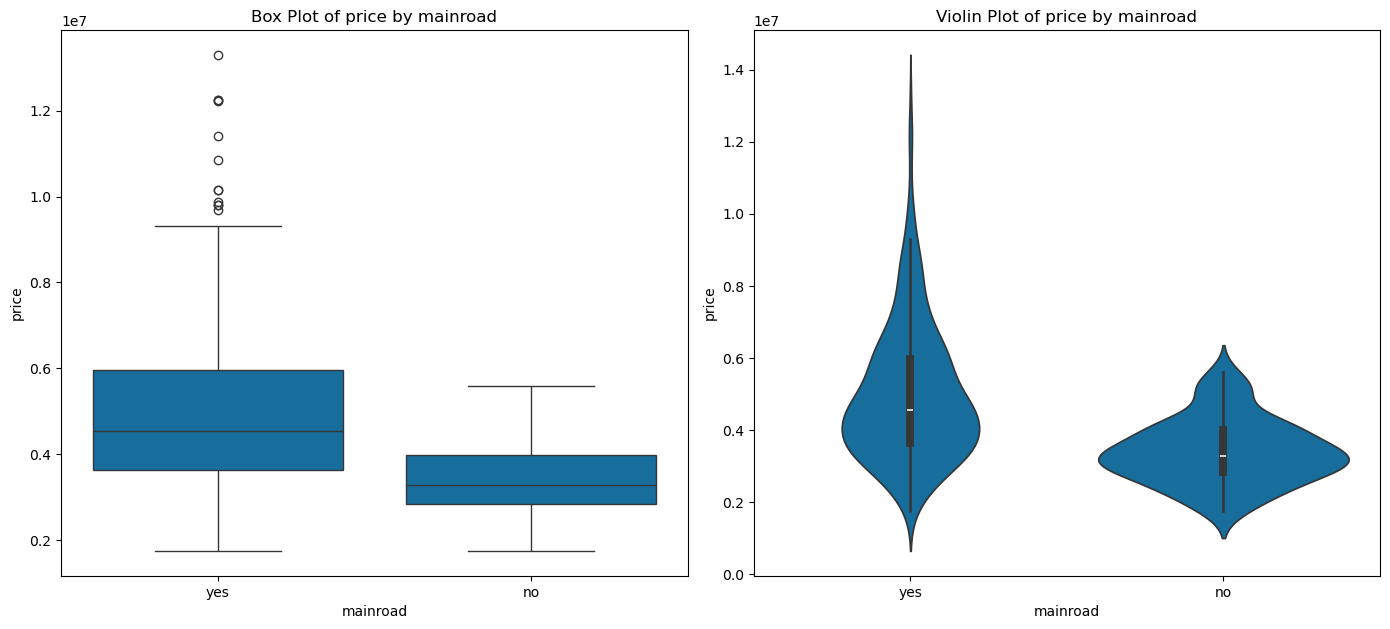

Correlation Measure,Correlation Value,Description,Explanation
Point Biserial,-0.296898,Very weak or no negative correlation,Measures correlation between a binary and a continuous variable.


In [466]:
pairwise_EDA(df, 'mainroad', 'price')

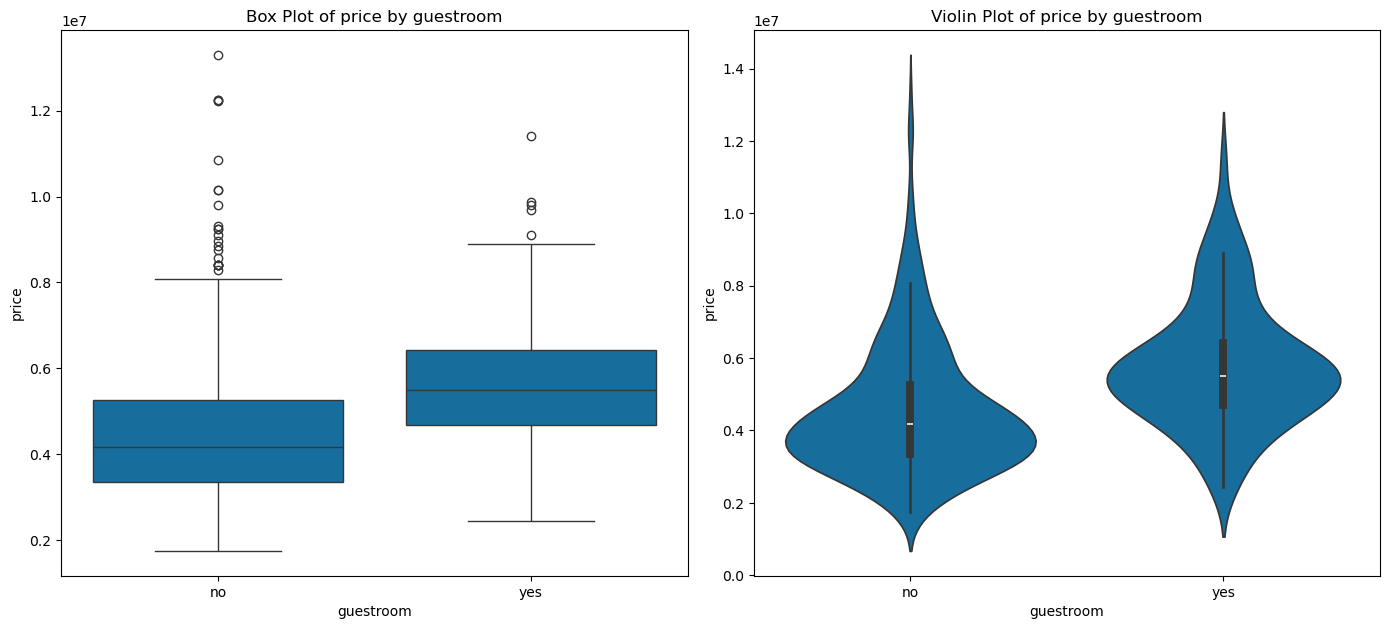

Correlation Measure,Correlation Value,Description,Explanation
Point Biserial,0.255517,Very weak or no positive correlation,Measures correlation between a binary and a continuous variable.


In [467]:
pairwise_EDA(df, 'guestroom', 'price')

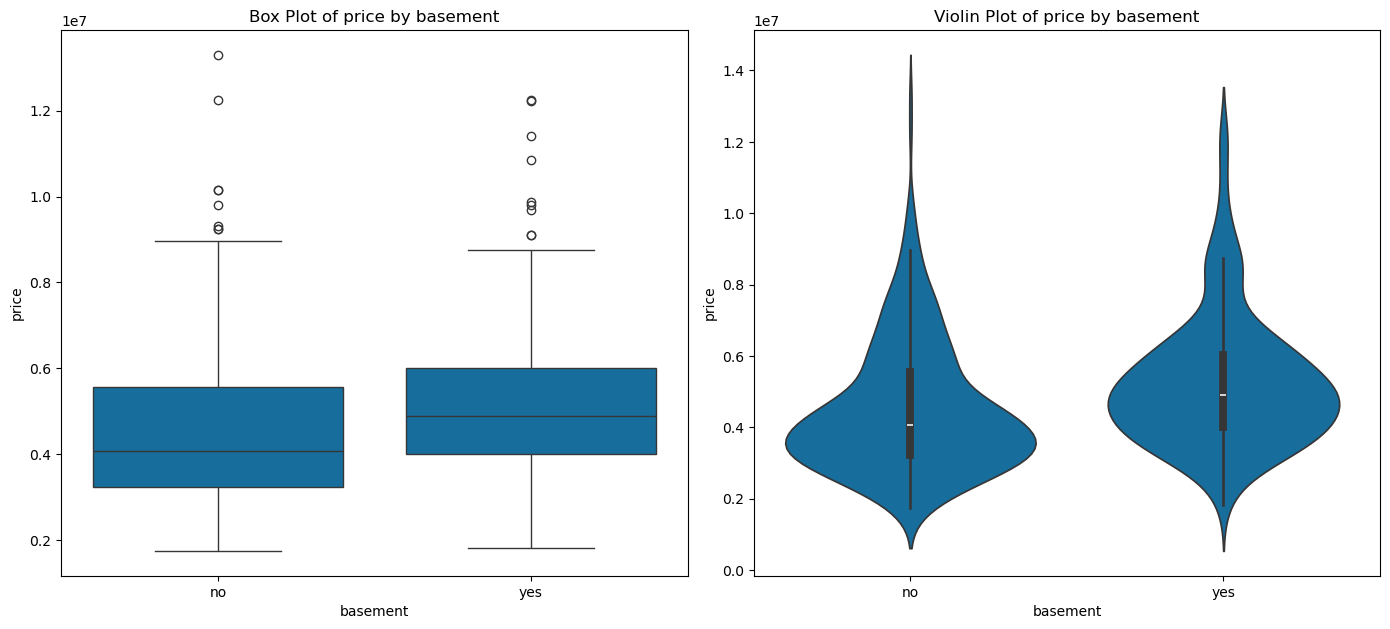

Correlation Measure,Correlation Value,Description,Explanation
Point Biserial,0.187057,Very weak or no positive correlation,Measures correlation between a binary and a continuous variable.


In [468]:
pairwise_EDA(df, 'basement', 'price')

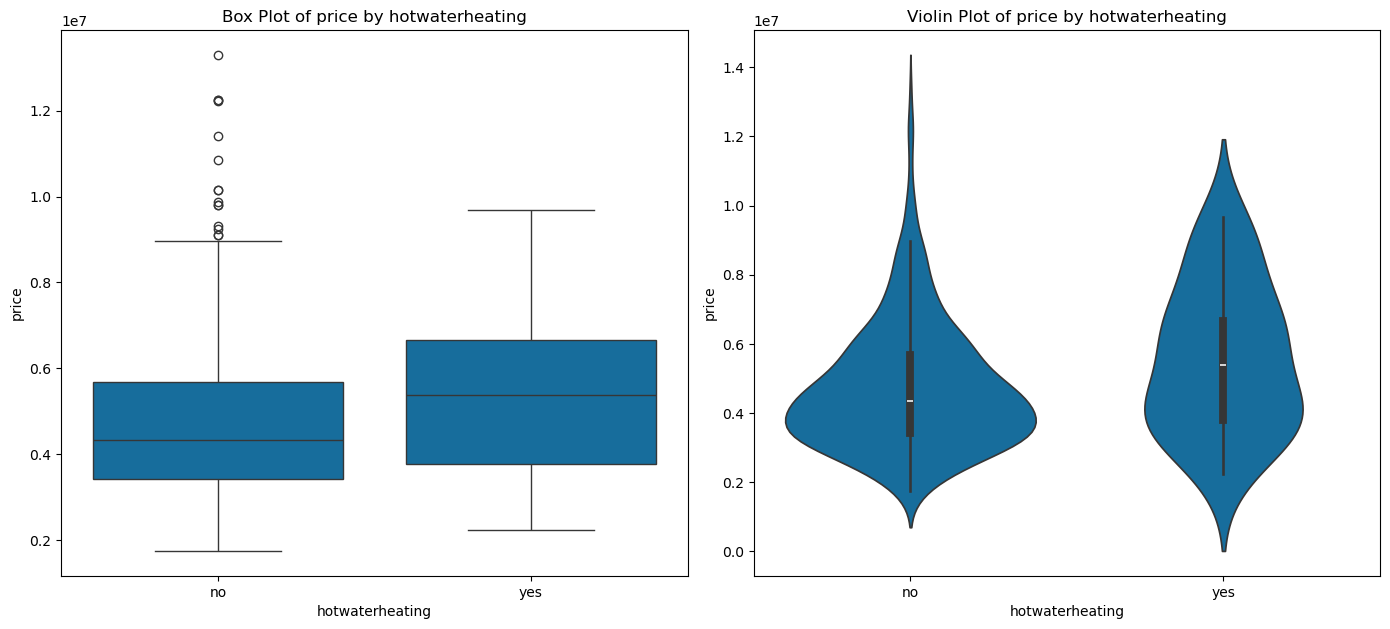

Correlation Measure,Correlation Value,Description,Explanation
Point Biserial,0.093073,Very weak or no positive correlation,Measures correlation between a binary and a continuous variable.


In [469]:
pairwise_EDA(df, 'hotwaterheating', 'price')

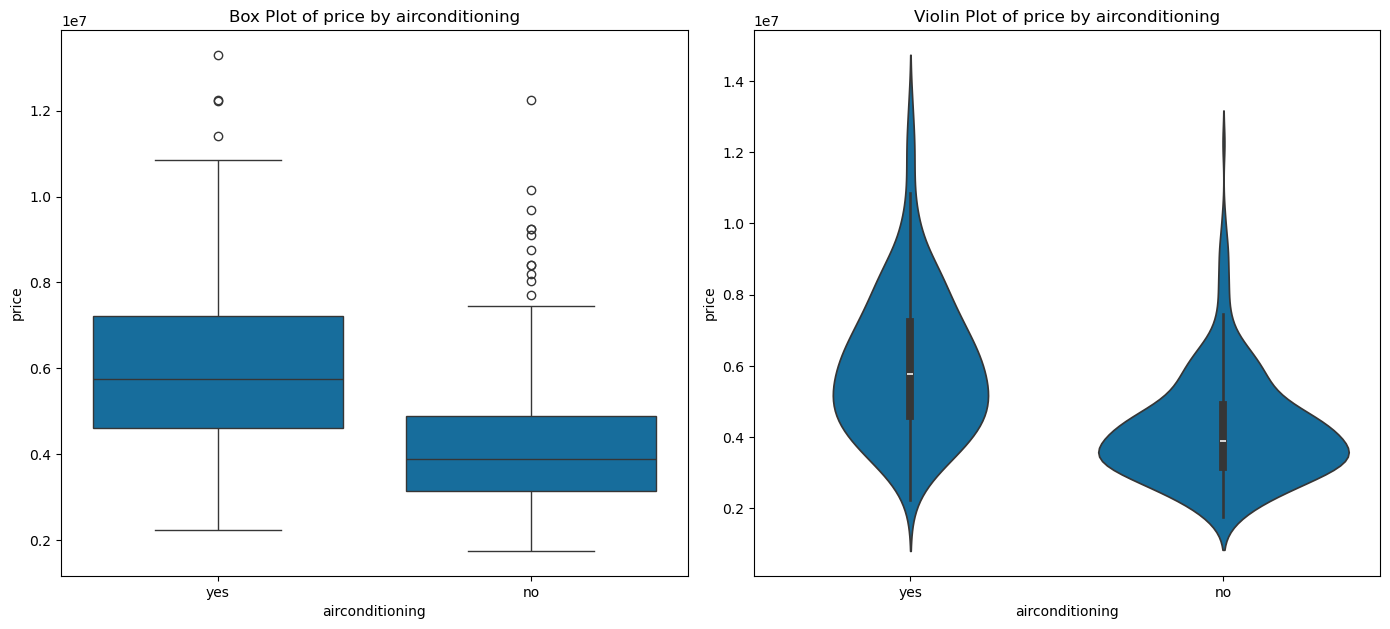

Correlation Measure,Correlation Value,Description,Explanation
Point Biserial,-0.452954,Weak negative correlation,Measures correlation between a binary and a continuous variable.


In [470]:
pairwise_EDA(df, 'airconditioning', 'price')

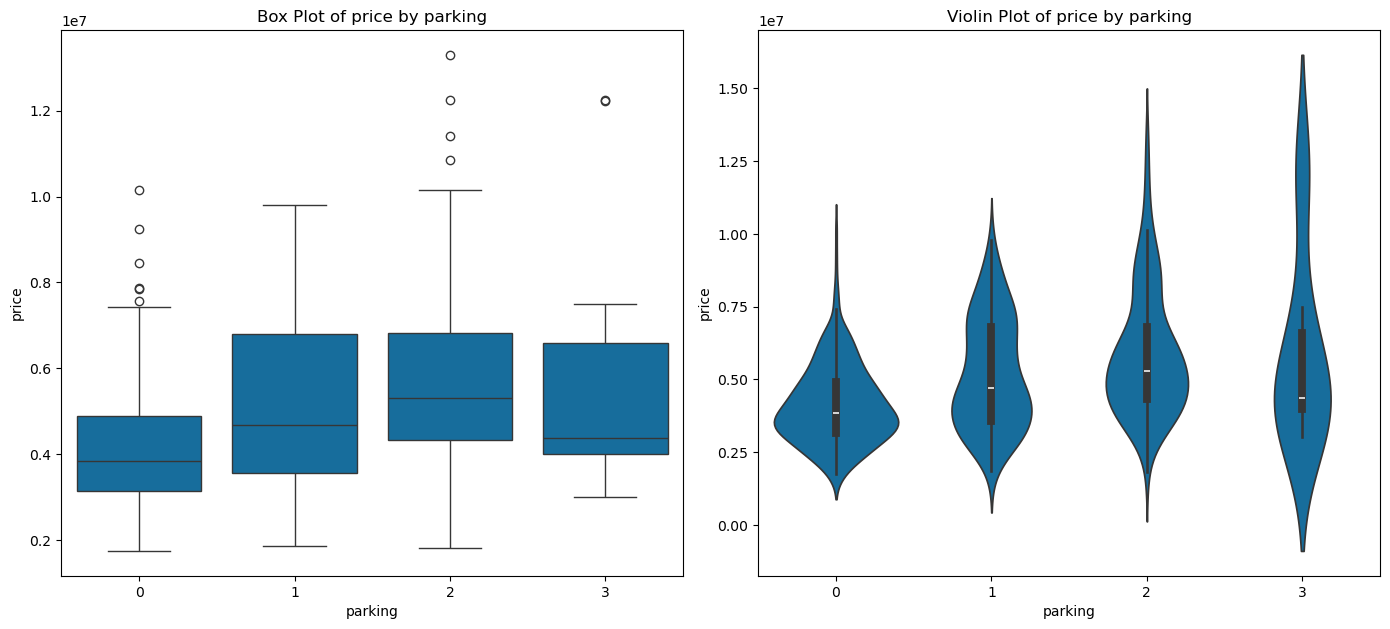

Correlation Measure,Correlation Value,Description,Explanation
Correlation Ratio (Eta),0.392965,Weak positive correlation,Measures correlation between a categorical and a continuous variable.


In [471]:
pairwise_EDA(df, 'parking', 'price')

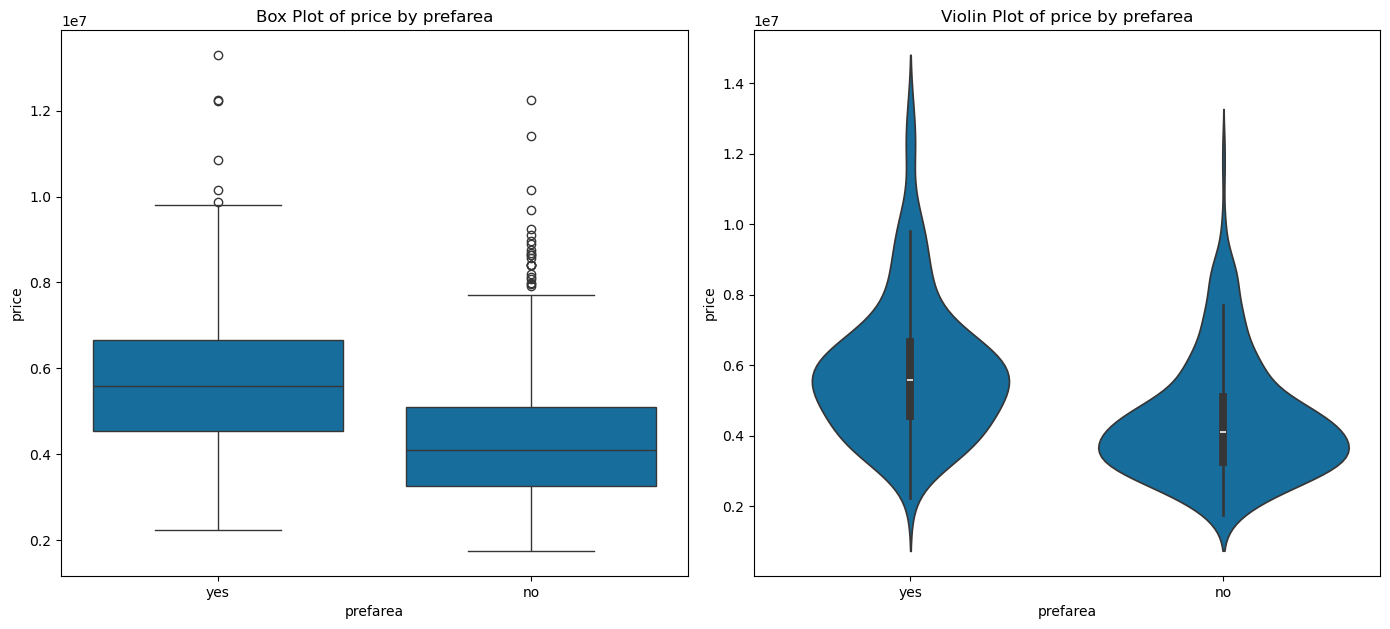

Correlation Measure,Correlation Value,Description,Explanation
Point Biserial,-0.329777,Weak negative correlation,Measures correlation between a binary and a continuous variable.


In [472]:
pairwise_EDA(df, 'prefarea', 'price')

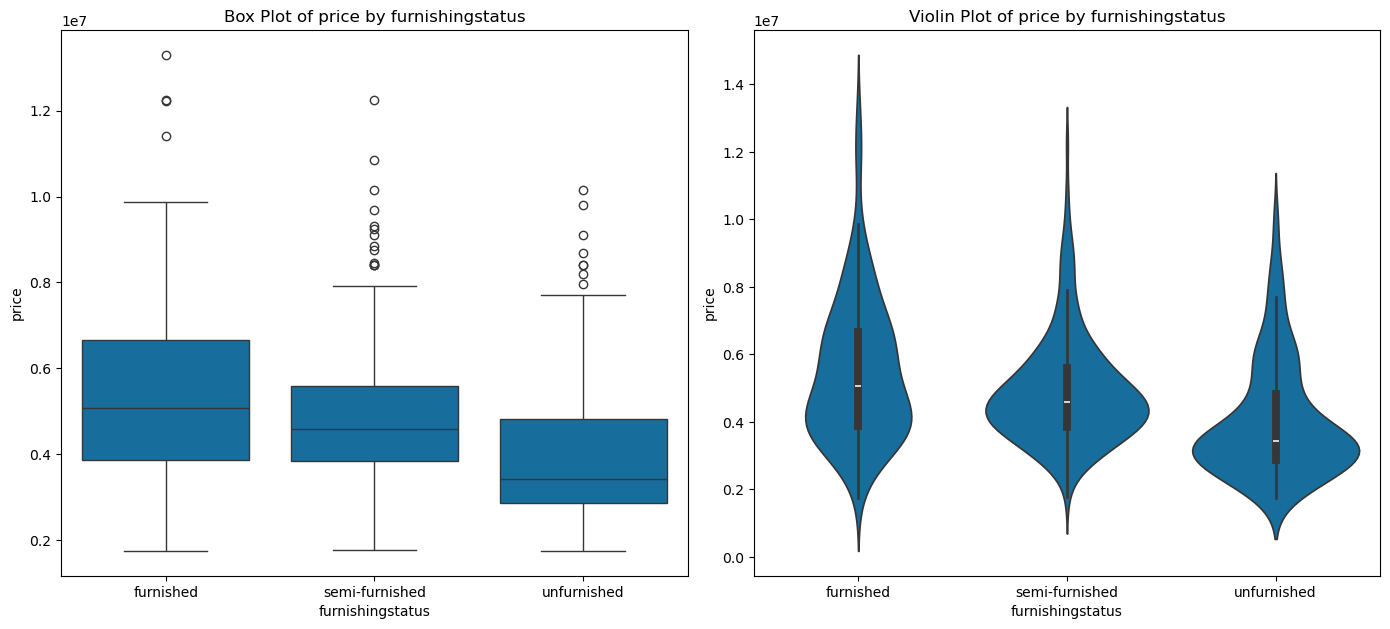

Correlation Measure,Correlation Value,Description,Explanation
Correlation Ratio (Eta),0.307359,Weak positive correlation,Measures correlation between a categorical and a continuous variable.


In [473]:
pairwise_EDA(df, 'furnishingstatus', 'price')

### Data Cleansing

We remove outliers. We also could have done some form of capping (limiting the maximal value on features) or imputation, but removal of outliers is fine given how few there are.

In [474]:
# Function to remove outliers
def remove_outliers(df, column, IQR_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - IQR_factor * IQR
    max_val = Q3 + IQR_factor * IQR
    df = df[(df[column] >= min_val) & (df[column] <= max_val)]
    return df

# Remove outlier rows based on price and area
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'area')

### Basic Feature Engineering

We now create some basic features based on our analysis:

In [475]:
# Mappings
df_copy = df.apply(lambda x: x.map({'yes': 1, 'no': 0}) if x.name in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] else x)

# One-hot encoding
df_copy = pd.get_dummies(df_copy, columns=['furnishingstatus'], drop_first=True, prefix='furnishingstatus', dtype=int)

# Fix skewness in area
import numpy as np
df_copy['area'] = np.log1p(df_copy['area'])

# New features
df_copy['totalrooms'] = df_copy['bedrooms'] + df_copy['bathrooms']
df_copy['roomratio'] = df_copy['bedrooms'] / df_copy['bathrooms']
df_copy['areaperroom'] = df_copy['area'] / df_copy['totalrooms']
df_copy.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'totalrooms', 'roomratio',
       'areaperroom'],
      dtype='object')

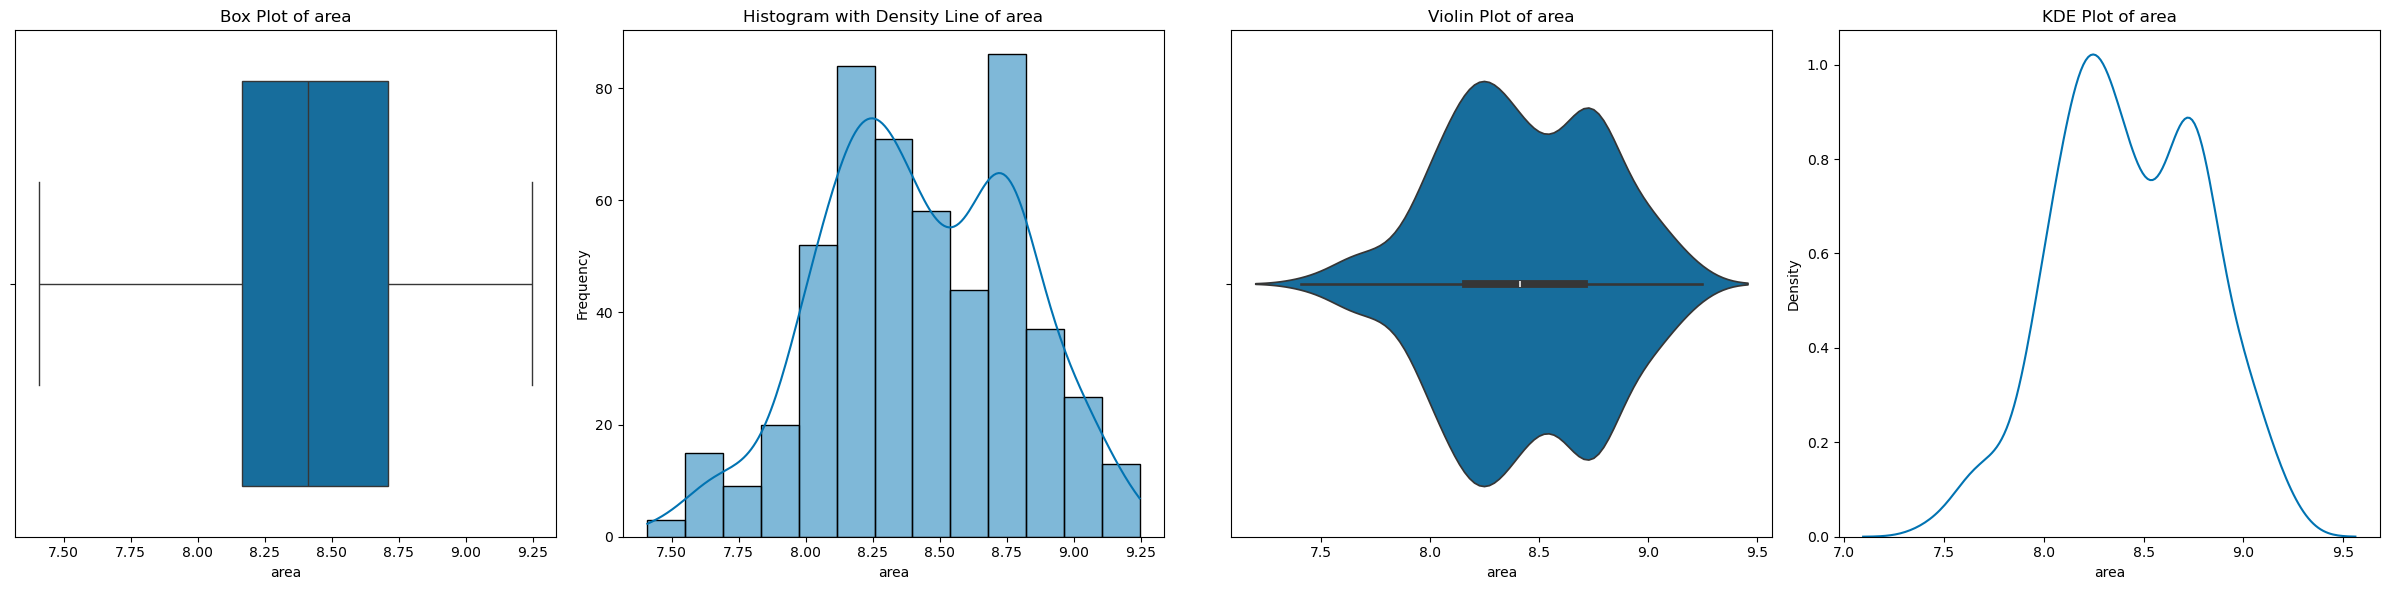

Aggregate Statistics of area:


count,mean,std,min,25%,50%,75%,max,missing
517.0,8.429433,0.366081,7.409136,8.1665,8.412055,8.707979,9.245804,0


No outliers detected.


In [476]:
single_variable_EDA(df_copy, 'area')

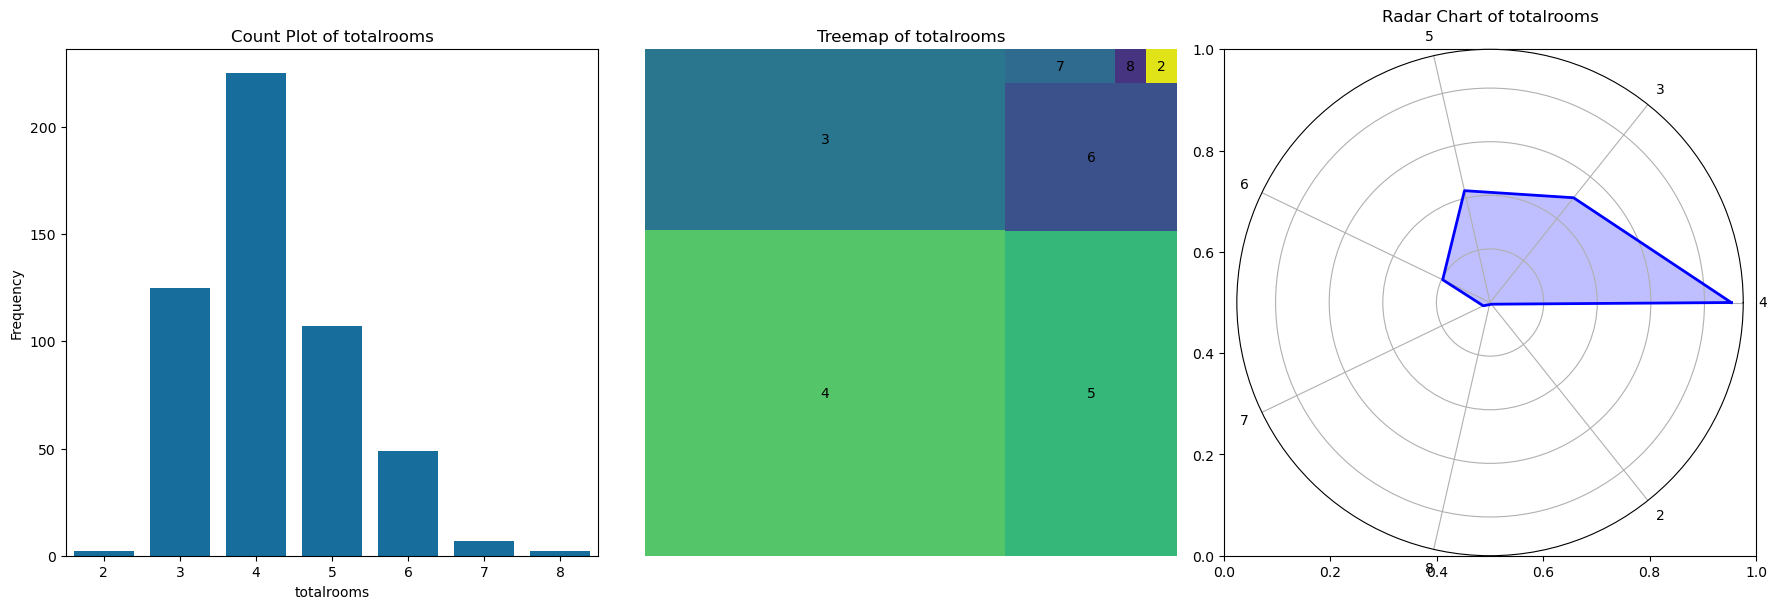

totalrooms,count,percentage
6,49,9.48%
4,225,43.52%
3,125,24.18%
5,107,20.7%
7,7,1.35%
8,2,0.39%
2,2,0.39%
totalrooms,count,percentage
2,2,0.39%
3,125,24.18%


Aggregate Statistics of totalrooms:


count,mean,std,min,25%,50%,75%,max,missing
517.0,4.203095,0.993852,2.0,4.0,4.0,5.0,8.0,0


In [477]:
single_variable_EDA(df_copy, 'totalrooms')

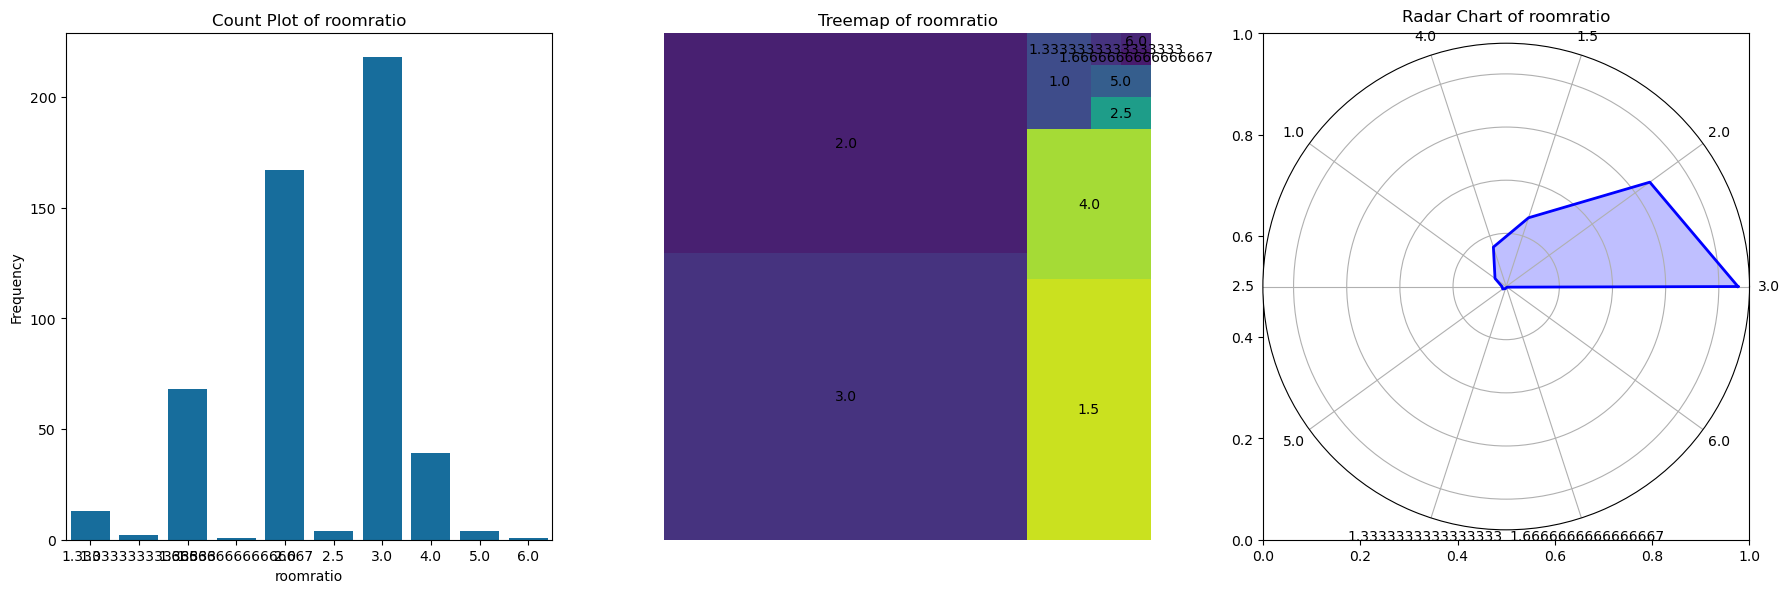

roomratio,count,percentage
4.000000,39,7.54%
3.000000,218,42.17%
2.000000,167,32.3%
1.000000,13,2.51%
1.500000,68,13.15%
2.500000,4,0.77%
5.000000,4,0.77%
1.333333,2,0.39%
1.666667,1,0.19%
6.000000,1,0.19%


Aggregate Statistics of roomratio:


count,mean,std,min,25%,50%,75%,max,missing
517.0,2.513217,0.789743,1.0,2.0,3.0,3.0,6.0,0


In [478]:
single_variable_EDA(df_copy, 'roomratio')

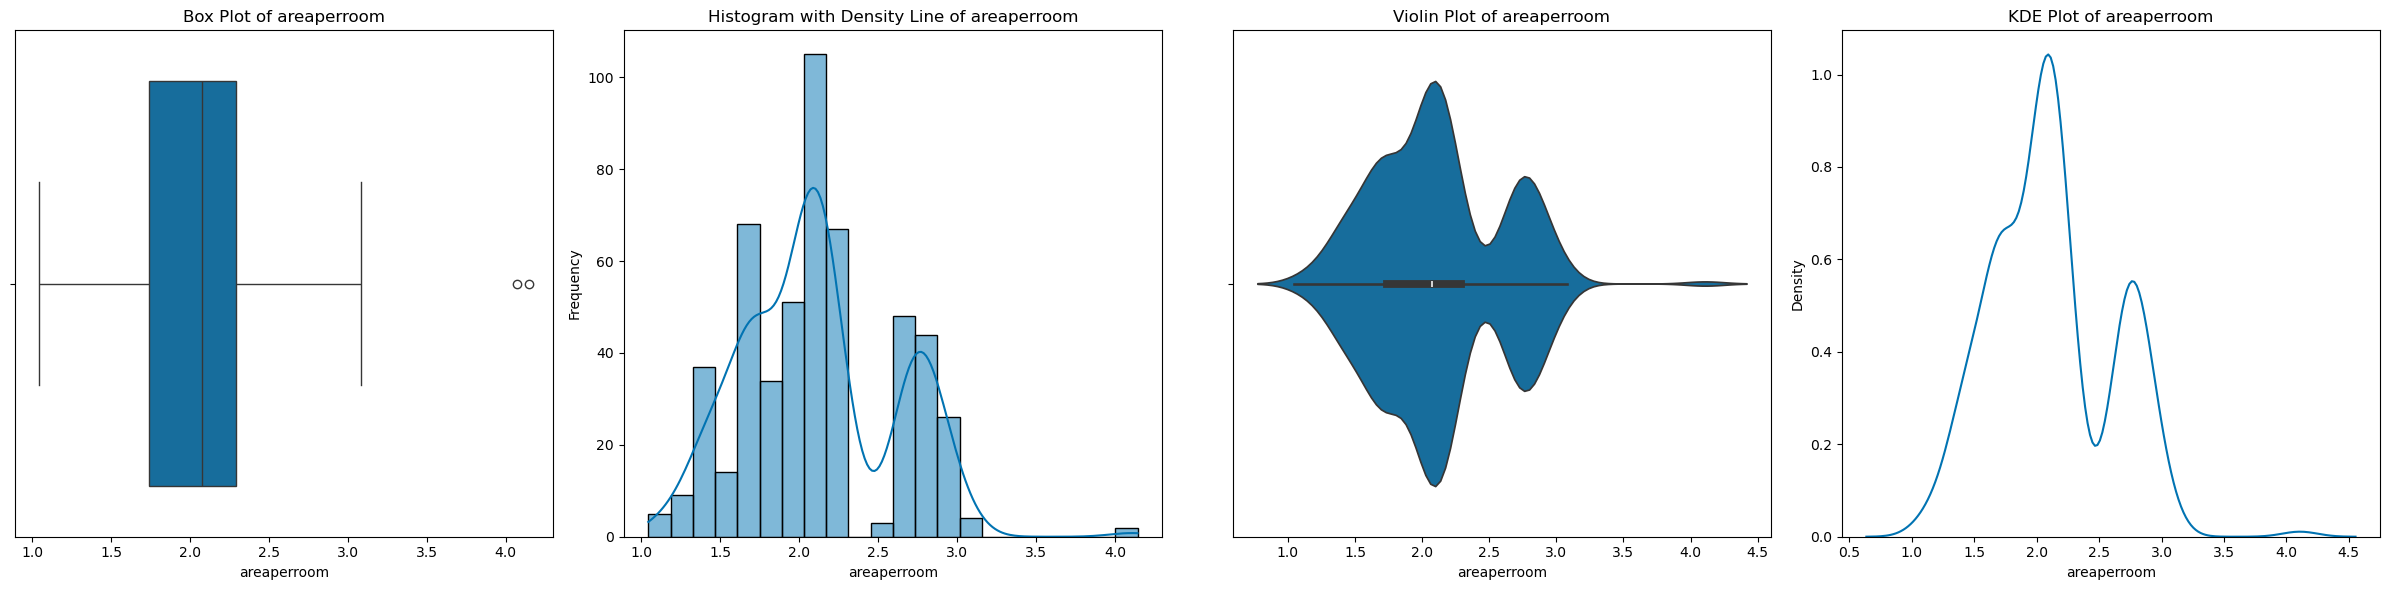

Aggregate Statistics of areaperroom:


count,mean,std,min,25%,50%,75%,max,missing
517.0,2.111574,0.477662,1.045825,1.739936,2.072949,2.292926,4.143387,0


Outlier examples (using IQR method) of areaperroom:


price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,totalrooms,roomratio,areaperroom
3150000,8.146419,1,1,1,1,0,0,0,0,0,0,0,0,2,1.0,4.073210
2275000,8.286773,1,1,1,0,0,0,0,0,0,0,0,1,2,1.0,4.143387


Note: only up to the first 25 outliers are displayed.
Total number of potential outliers: 2
Lower Bound (Q1 - 1.5*IQR): 0.9105 / Upper Bound (Q3 + 1.5*IQR): 3.1224


In [479]:
single_variable_EDA(df_copy, 'areaperroom')

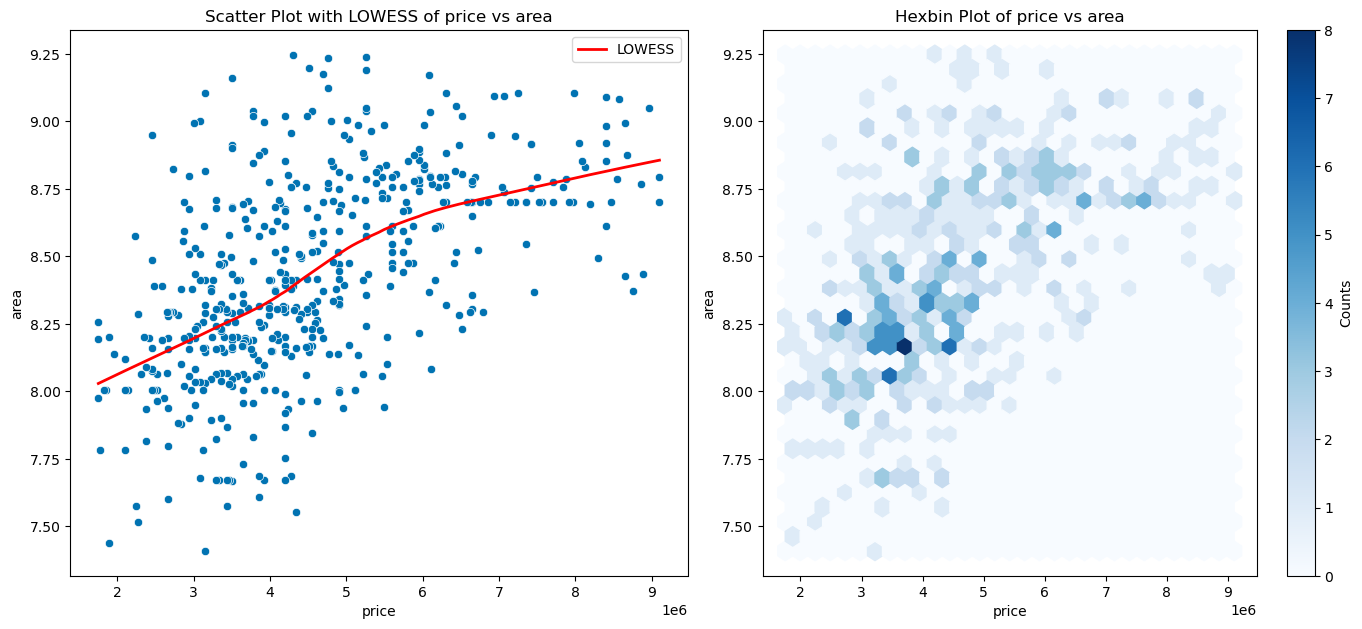

Correlation Measure,Correlation Value,Description,Explanation
Pearson,0.549398,Moderate positive correlation,Linear relationship. Sensitive to outliers and non-linearity.
Spearman,0.577552,Moderate positive correlation,Monotonic relationship. Differs from Pearson in handling outliers and non-linearity.
Kendall,0.401533,Weak positive correlation,Ordinal (rank) relationship. Differs from Spearman in handling ties.


In [480]:
pairwise_EDA(df_copy, 'price', 'area')

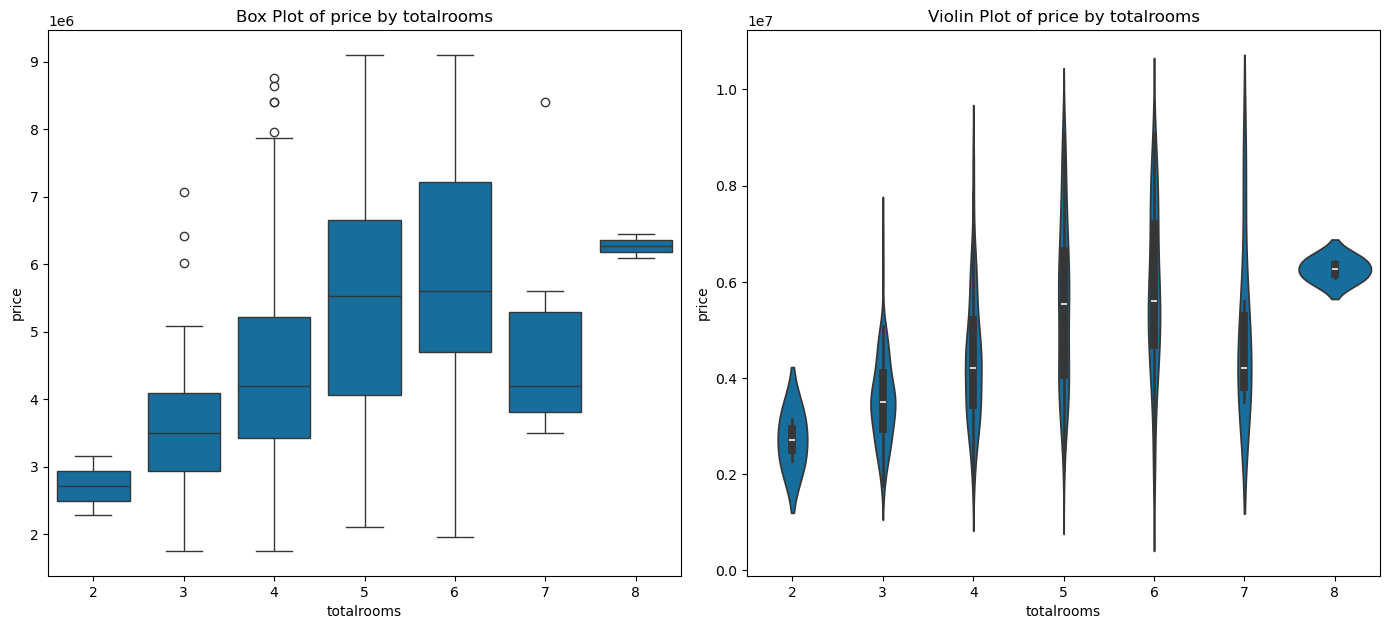

Correlation Measure,Correlation Value,Description,Explanation
Correlation Ratio (Eta),0.717398,Moderate positive correlation,Measures correlation between a categorical and a continuous variable.


In [481]:
pairwise_EDA(df_copy, 'price', 'totalrooms')

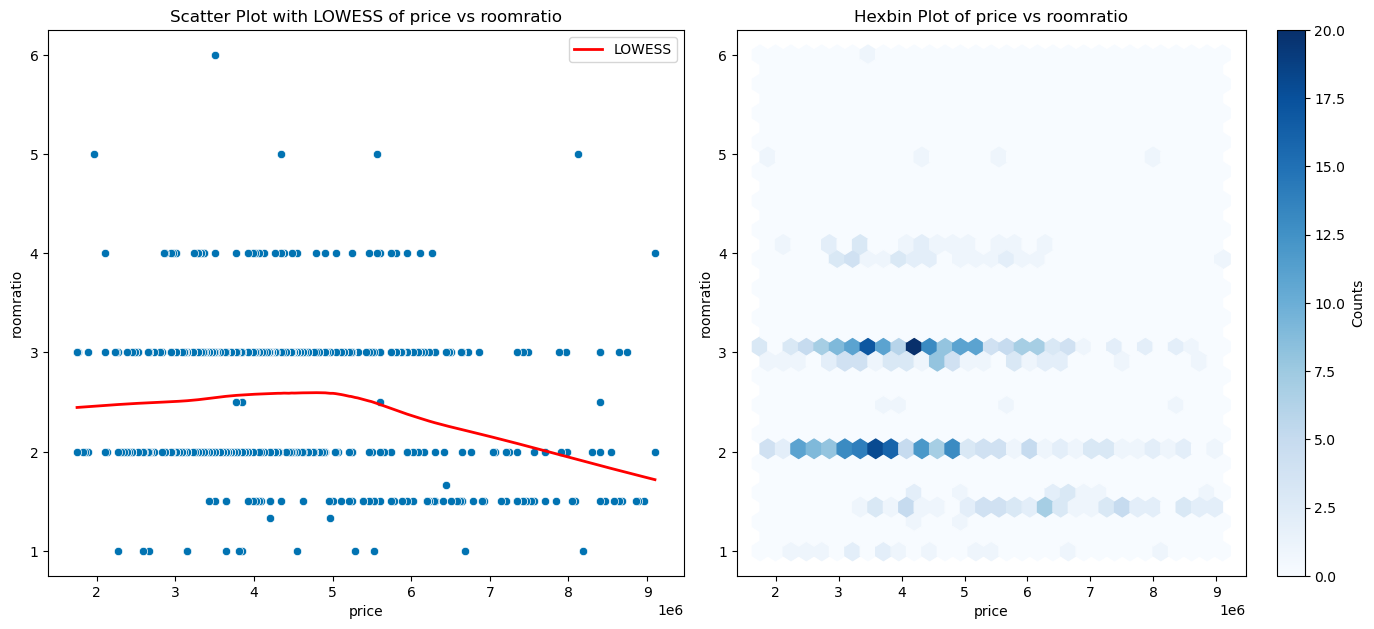

Correlation Measure,Correlation Value,Description,Explanation
Pearson,-0.153180,Very weak or no negative correlation,Linear relationship. Sensitive to outliers and non-linearity.
Spearman,-0.144961,Very weak or no negative correlation,Monotonic relationship. Differs from Pearson in handling outliers and non-linearity.
Kendall,-0.105691,Very weak or no negative correlation,Ordinal (rank) relationship. Differs from Spearman in handling ties.


In [482]:
pairwise_EDA(df_copy, 'price', 'roomratio')

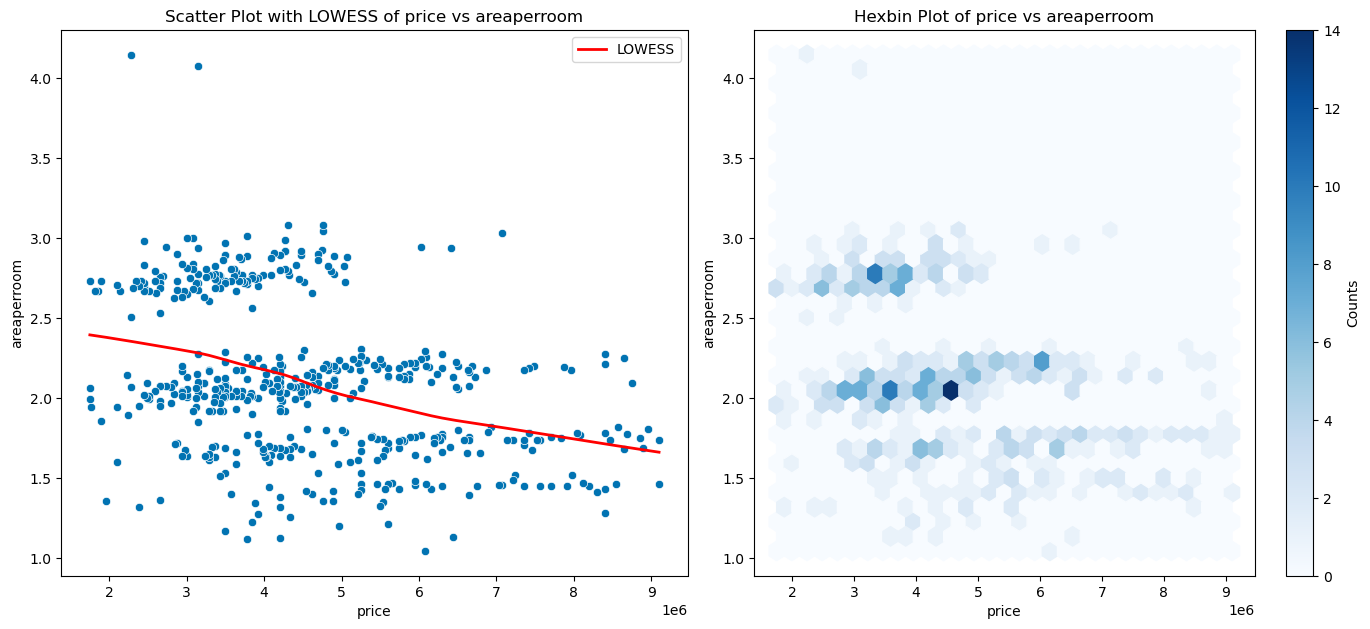

Correlation Measure,Correlation Value,Description,Explanation
Pearson,-0.382244,Weak negative correlation,Linear relationship. Sensitive to outliers and non-linearity.
Spearman,-0.311461,Weak negative correlation,Monotonic relationship. Differs from Pearson in handling outliers and non-linearity.
Kendall,-0.199106,Very weak or no negative correlation,Ordinal (rank) relationship. Differs from Spearman in handling ties.


In [483]:
pairwise_EDA(df_copy, 'price', 'areaperroom')

### Splitting the data

In [484]:
X, y = df_copy.drop(columns=['price']), df_copy['price']

In [485]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

Note, we always do this *after* splitting training and test sets. We don't want to standardize on the entire dataset - technically, that would be a form of data leakage. Why? Beacuse you would be using some of the test data to scale the training data!

In [486]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Put the original column names back on the scaled features (I wish sklearn did this or had an option to do this)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Reset indices (this is necessary because putting the data back into a DataFrame causes the indices to be all out of order)
X_train_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)
y_train = pd.Series(y_train).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

### Basic Linear Modeling

In [487]:
# Linear regression using R-like library
import statsmodels.api as sm

# Add constant term to our X data
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit the model
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()

# print out table nicely html inline
from IPython.display import display
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     54.17
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           3.64e-86
Time:                        21:51:24   Log-Likelihood:                -6245.4
No. Observations:                 413   AIC:                         1.252e+04
Df Residuals:                     397   BIC:                         1.259e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.534e+06   4.49e+04    101.094      0.000    4.45e+06    4.62e+06
area                             5.264e+05   6.31e+04      8.349      0.000    4.02e+05     6.5e+05
bedrooms                         2.143e+05   1.49e+05      1.438      0.151   -7.87e+04    5.07e+05
bathrooms                       -3.522e+05   2.45e+05     -1.438      0.151   -8.34e+05    1.29e+05
stories                          3.871e+05    5.6e+04      6.909      0.000    2.77e+05    4.97e+05
mainroad                         1.149e+05   4.92e+04      2.335      0.020    1.81e+04    2.12e+05
guestroom                        1.539e+05   4.96e+04      3.102      0.002    5.64e+04    2.51e+05
basement                          1.49e+05    5.2e+04      2.865      0.004    4.67e+04    2.51e+05
hotwaterheating                  1.364e+05   4.61e+04      2.959      0.003    4.58e+04    2.27e+05
airconditioning                   3.82e+05   4.99e+04      7.663      0.000    2.84e+05     4.8e+05
parking                          1.757e+05   4.85e+04      3.626      0.000    8.04e+04    2.71e+05
prefarea                         2.056e+05   4.74e+04      4.333      0.000    1.12e+05    2.99e+05
furnishingstatus_semi-furnished -1.612e+04   5.73e+04     -0.282      0.778   -1.29e+05    9.64e+04
furnishingstatus_unfurnished    -1.392e+05   5.79e+04     -2.403      0.017   -2.53e+05   -2.53e+04
totalrooms                      -6193.6017   7.38e+04     -0.084      0.933   -1.51e+05    1.39e+05
roomratio                       -5.773e+05   2.32e+05     -2.483      0.013   -1.03e+06    -1.2e+05
areaperroom                     -4.225e+05   1.95e+05     -2.164      0.031   -8.06e+05   -3.87e+04
==============================================================================
Omnibus:                       35.892   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.780
Skew:                           0.576   Prob(JB):                     2.84e-13
Kurtosis:                       4.425   Cond. No.                     7.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [488]:
# Test model, and print results
y_pred = results.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

Root Mean Squared Error: 988290.8764826987
R^2: 0.6670827834532997


/home/edwardchang/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [489]:
# Based on output above, remove features that have p-values greater than 0.05
features_to_remove = ['bedrooms', 'bathrooms', 'furnishingstatus_semi-furnished', 'totalrooms']

X_train_scaled.drop(columns=features_to_remove, inplace=True)
X_test_scaled.drop(columns=features_to_remove, inplace=True)

# Fit the model
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()

# print out table nicely html inline
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     67.61
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           2.28e-88
Time:                        21:51:24   Log-Likelihood:                -6246.6
No. Observations:                 413   AIC:                         1.252e+04
Df Residuals:                     400   BIC:                         1.257e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4.534e+06   4.48e+04    101.166      0.000    4.45e+06    4.62e+06
area                          5.149e+05   5.22e+04      9.856      0.000    4.12e+05    6.18e+05
stories                        3.84e+05   5.55e+04      6.915      0.000    2.75e+05    4.93e+05
mainroad                      1.166e+05    4.9e+04      2.382      0.018    2.04e+04    2.13e+05
guestroom                     1.511e+05   4.94e+04      3.062      0.002    5.41e+04    2.48e+05
basement                      1.445e+05   5.18e+04      2.790      0.006    4.27e+04    2.46e+05
hotwaterheating               1.432e+05   4.57e+04      3.135      0.002    5.34e+04    2.33e+05
airconditioning               3.863e+05   4.94e+04      7.817      0.000    2.89e+05    4.83e+05
parking                       1.723e+05   4.83e+04      3.565      0.000    7.73e+04    2.67e+05
prefarea                      2.117e+05    4.7e+04      4.504      0.000    1.19e+05    3.04e+05
furnishingstatus_unfurnished   -1.3e+05   4.65e+04     -2.796      0.005   -2.21e+05   -3.86e+04
roomratio                    -2.392e+05   4.58e+04     -5.226      0.000   -3.29e+05   -1.49e+05
areaperroom                   -3.27e+05   5.46e+04     -5.985      0.000   -4.34e+05    -2.2e+05
==============================================================================
Omnibus:                       34.313   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.584
Skew:                           0.559   Prob(JB):                     1.40e-12
Kurtosis:                       4.386   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [490]:
# Test model, and print results
y_pred = results.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

Root Mean Squared Error: 971893.3343396095
R^2: 0.6780385387897581


/home/edwardchang/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
